# Notebook for running MLR on London LCL data
incorporates inputs from earlier notebooks     
New config - all functions moved to separate module


Configure Colab:

In [ ]:
# mount my google drive to colab VM (authorize VM session)
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# list my Google Drive colab folder contents
!ls "drive/My Drive/ColabProject"

'Colab-IrlANN Run1.zip'		 ColabProjectInputs_19July.zip
 ColabIRLProjectRun2.zip	 ColabProjectInputs_23July.zip
 ColabLCLProjectRun2.zip	 mscprojectcoding
 ColabLCLProject.zip		 notebooks-inputVersions
 ColabProjectInputs_16July.zip	 project_data


In [ ]:
#list VM drive contents
!pwd
!ls 

/content
drive  sample_data


In [ ]:
inputZipFileName = "ColabProjectInputs_23July.zip"
#inputFilePathName = "drive/My Drive/ColabProject/"
#fullInputName = inputFilePathName+inputZipFileName

In [ ]:
!cp "drive/My Drive/ColabProject/ColabProjectInputs_23July.zip" /content

In [ ]:
!ls 

ColabProjectInputs_23July.zip  drive  sample_data


In [ ]:
# unzip to colab VM and check contents
from zipfile import ZipFile
with ZipFile(inputZipFileName,'r') as myZipFile:
  myZipFile.extractall()
  print('done')

done


In [ ]:
!ls

ColabProjectInputs_23July.zip  mscprojectcoding  sample_data
drive			       project_data


In [ ]:
#!mkdir mscprojectcoding
!mkdir project_data
!mkdir project_data/intermediateDataLCL

mkdir: cannot create directory ‘project_data’: File exists
mkdir: cannot create directory ‘project_data/intermediateDataLCL’: File exists


In [ ]:
!cp "drive/My Drive/ColabProject/mscprojectcoding/*.py" /content/mscprojectcoding/


cp: cannot stat 'drive/My Drive/ColabProject/mscprojectcoding/*.py': No such file or directory


In [ ]:
# only if need to import any files not in zipfile
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving LCL_hourly_df.pkl to LCL_hourly_df.pkl


In [ ]:
# import  module containing all my functions 
import mscprojectcoding.FM_MScProject_LoadForecasting_Module as FMmodule


In [ ]:
# force reimport of module after edits/updates to functions in PyCharm 
import importlib
importlib.reload(FMmodule)

<module 'mscprojectcoding.FM_MScProject_LoadForecasting_Module' from '/content/mscprojectcoding/FM_MScProject_LoadForecasting_Module.py'>

In [ ]:
#import all my functions

from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  annPlot                    # plots ANN model forecast for specified windows 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  annPlotInputs              # shift train&test forecasts to align with hr/day indices ie unpack into actual time bands - similar to shiftInputs but returns dictionary of np arreays for test AND train wondows
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_MLP                 # create MLP for ANN
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredictSeries  # split Train and Test numpy arrays for MLR 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredict_df     # split Train and Test data into dfs for ANN - standard version
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredict_df_V2  # split Train and Test data into dfs for ANN - version with day of week classifier scaling
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_save_folder         # create folder name for saving results
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  cv_calc                    # Error calculation - coeff of variance error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  findkeys                   # get all keys and subkeys of nested dictionary 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  flip_dictionary            # invert dictionary nest levels for plotting results (MLR and/or ANN)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  fullprint                  #change num lines to print of a numpy array without changing default
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_NPminmax_values        # get max value in each col OR full np array
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_NaN_stats              # get stats for NaNs in each column
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_TrainTestSeries        # for ANN inputs ?
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_data_range
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_errors                 # compute errors for supplied models, hardwired for MAPE,MAE,CV,RMSE,NRMSE errors
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_limits                 # get x,y limits for plot axis
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_save_folderName        # generate folder name for saving results files
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_uniques                # get unique values from dataframe columns or pd.series?
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_error_percentiles      # get specified percentiles from error dictionary (MLR, ANN)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_errorDictionary        # load error dictionary from disk given path name
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_MLRerrorDictionary     # load MLR error dictionary from disk given path name 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  getTrainTestSeriesNames    # generate list of train, test series names from eg loadSeries, envSeries dictionaries
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  historyPlot                # plots loss function from ANN MLP history object
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  lrmodel_r2                 # 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mae_calc                   # Error calculation - mean avg error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mape_calc                  # Error calculation - Mean avg percentage error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mlr_predict                # returns forecast given MLR regression model
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mlr_train                  # returns MLR regression model 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  merge_TrainTestErrors      # for ANN??
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  nrmse_calc                 # Error calculation - normalised root mean square error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  peristModelPlot            # plot persistence model series
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  persistDataWindowed        # generates persistence models with variable window size search
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  persistScatterPlot         # plot peristance models 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  piecewise_linear           # comput piecewise linear function given slopes, intercept etc
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plotSectionOfLoadProf      # redundant? used in MLR scripts
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_allFeatures           # plot selected columns of numpy array 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_errors                # plot avg errors from errors dictionary (eg for all MLR models)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_forecast              # plot forecast for specified tiime periods (MLR only?)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  pltDefaults                # set rc params (matplotlib) plot defaults
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  populate_AllFeatures       # populate numpy array for MLR 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_get                     # persistence model r2 calculations
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_histogram               # plotting of r2 histogram for variable window search persistence model 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_histogramV2             # similar but tailored for publication plots (most series greyed out)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  randomUserGroupAggregate   # form group aggregate load df for random userD grps created by randomUserGroups
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  randomUserGroups           # form random userID clusters of size N  
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  removeNestings
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  rmse_calc                  # Error calculation - root mean sq error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  round_down                 # round a number down to nearest decade (0.1,1,10,100 etc) 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  round_up                   # round a number up to nearest decade (0.1,1,10,100 etc)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  sbn_plotErrors             # plot MLR,ANN model errors as boxplot, swarm plot - V1 : plot for various error types - ordered by error type , not model type
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  sbn_plotErrors_V2          # plot MLR,ANN model errors as boxplot, swarm plot - V2 : Version 2 :plots one error type with subplot for each model
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_dowSeries              # set day of week classifier channels given a dayOfWeek classifier list
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_envSeries              # set environment series to be used in MLR and/or ANN 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_loadSeries             # select which load series to use in MLR and/or ANN 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  shiftInputs                # shift models/forecast series to align with hr/day indices of load ie unpack into actual time bands
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  show_mem_usage             # shows total memory usage
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  stackplot_of_forecast      # plots time window of all passed model forecasts,loads - load profiles stacked by calendar day

from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_percentileTraces      # plot percentile traces extracted from percentile dictionaries created from e.g. ANN and MLR errro dictionaries


In [ ]:
# get list of all functions in module
#dir(FMmodule)

In [ ]:
# import standard packages /modules etc : may not need all these..

import matplotlib as mpl

import matplotlib.pyplot as plt     # pyplot = collection of command style functions that make matplotlib work like MATLAB, uses numpy arrays internally
import matplotlib.colors as colors2  # module for converting numbers or color arguments to RGB or RGBA
import matplotlib.cm as cmx         # built-in colour maps and utilities; Any colormap can be reversed by appending '_r', so 'RdYlGn_r' is the reversed Red-Yellow-Green colormap
import matplotlib.mlab as mlab      # matlab compatible cmd names
import matplotlib.ticker as mtick   # configurable tick locating and formatting, used by Axis class
import matplotlib.dates as mdates    # useful for getting tick label as siimple dates

import matplotlib.patches as mpatches  # draw geometric shapes 
from matplotlib.patches import Rectangle
import matplotlib.lines as mlines      # 2D lines
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator,MaxNLocator) # needed for eg integer tick marks etc

import seaborn as sns                  # data visualization library based on matplotlib             

%matplotlib inline

import math                            # module provides access to the mathematical functions defined by the C standard
import csv
import sys
import pandas as pd
import numpy as np
import time                 
import re                              # provides regular expression matching operations 
import random
import os

from six.moves import cPickle as pickle   # cPickle is faster as written in C but merged with Pickle in Python 3.x ..

import numpy.polynomial.polynomial as poly  # polynomial functions incl fitting , etc

from sklearn.cluster import KMeans    # Sklearn = SciPy ML toolkit 
from sklearn import linear_model            # Estimated coefficients for linear regression
#from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression
from sklearn import metrics

from scipy.interpolate import interp1d      # Interpolate a 1-D function.
from scipy.spatial.distance import cdist, pdist       # Pairwise distances between observations in n-dimensional space.
from scipy.spatial.distance import squareform         # Convert a vector-form distance vector to a square-form distance matrix, and vice-versa
from scipy.cluster.hierarchy import dendrogram, linkage   # hierarchical/agglomerative clustering 
from scipy.cluster.hierarchy import fcluster              # Form flat clusters from the hierarchical clustering
from scipy import stats                                   # statistical functions https://docs.scipy.org/doc/scipy/reference/stats.html
from scipy import optimize             # commonly used optimization algorithms eg least squares minimization, curve fitting , etc

import json
from datetime import datetime, timedelta 

from itertools import chain           # for iterating through list (of lists) of dictionaries etc
from pathlib import Path              # file/folder paths etc

import requests                              # url requests
#from plot_keras_history import plot_history

import importlib  # import other module eg my package

In [ ]:
#set matplotlib defaults
#https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

#to modify defaults (dynamically - just for this session):
#matplotlib.rc('lines', linewidth=2, color='r')

#plt.style.available[:]
#plt.style.use('stylename')
matplotlib.matplotlib_fname()   # find where default rcParams imported from : C:\Users\fmurphy\Miniconda3\envs\fm_ANN\Lib\site-packages\matplotlib\mpl-data\matplotlibrc


'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc'

In [ ]:
# SET SEABORN DEFAULTS

# https://seaborn.pydata.org/tutorial/aesthetics.html
# https://seaborn.pydata.org/generated/seaborn.set_style.html
# https://matplotlib.org/tutorials/introductory/customizing.html

#sns.set_style() # (style=None, rc=None) Set the aesthetic style of the plots. 
sns.set_style(style="whitegrid",
              rc= 
             {'axes.linewidth': 1, 
               'axes.edgecolor':'black', 
               'xtick.direction': 'out',
               'xtick.major.size': 4.0, 
               'ytick.direction': 'out', 
               'ytick.major.size': 4.0, 
               'axes.facecolor': 'white',
               'grid.color': '.8', 
               'grid.linestyle': u'-', 
               'xtick.minor.size': 3.0, 
               'ytick.minor.size': 3.0, 
               'grid.linewidth': 0.})        
sns.axes_style()                  # returns current settings (default axes styles)

plt.style.use('seaborn')     # switch to seaborn style
# plot code
# ...

plt.style.use('default')     # switches back to default matplotlib style
# plot code
# ...

# to see all available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
# to avoid warning message 
#C:\Users\fmurphy\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
# override some default print parameters
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',None)

#np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=2000)
np.set_printoptions(edgeitems=10)


** SKIP NEXT FEW CELLS RERUNNING : READ ENV DATA FROM CSV INSTEAD **

In [ ]:
# get hourly weather data 
df_wxDarksky = pd.read_pickle('../project_data/intermediateDataLCL/London_df_wxDarksky.pkl')

dtypes = { 'summary':'category','icon':'category','precipIntensity':'float32','precipProbability':'float32',\
           'temperature':'float32','apparentTemperature':'float32','dewPoint':'float32','humidity':'float32',\
           'pressure':'float32','windSpeed':'float32','windGust':'float32','windBearing':'float32','cloudCover':'float32',\
           'uvIndex':'float32','visibility':'float32','precipType':'category','precipAccumulation':'float32' }

date_col = ['date_time']
df_wxDarksky = df_wxDarksky.astype(dtype=dtypes)

# set datetime index from POSIX time 
df_wxDarksky['date_time'] = pd.to_datetime(df_wxDarksky['time'],unit='s')
df_wxDarksky['date_time'] = df_wxDarksky['date_time'].dt.tz_localize('UTC') # not really required..
df_wxDarksky = df_wxDarksky.set_index('date_time')
           
# sort by time index if needed
df_wxDarksky_sorted = df_wxDarksky.sort_index(axis=0,inplace=False)


wx_var='temperature'
hourlyTemp = df_wxDarksky[wx_var].interpolate(method='pad', limit=5).to_numpy(dtype='float64')      # pad up to 5 consecutive NaNs
hourlyTempSeries = df_wxDarksky[wx_var].interpolate(method='pad', limit=5) # if want pd.Series with datetime index

print(len(hourlyTemp))
hourlyTemp  

#hourlyTempSeries.to_csv('../project_data/intermediateDataLCL/London_Temperature.csv')
#np.save('../project_data/intermediateDataLCL/London_Temperature',hourlyTemp)    # save to .npy file

8760


array([9.56999969, 9.38000011, 9.18000031, 7.88000011, 7.38000011,
       6.36999989, 5.38000011, 5.07999992, 4.67000008, 4.57999992, ...,
       7.57000017, 7.28000021, 7.17000008, 6.76999998, 6.1500001 ,
       6.67000008, 5.61999989, 5.96999979, 6.67000008, 7.67999983])

In [ ]:
# set for daylight hours extraction
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', \
          'November', 'December']
daynum = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# set date window of interest
start='1/1/2013'
end='1/1/2014'

# create date df from start to end date
colsD = pd.date_range(start, end, freq='1D')[0:-1]  # returns DatetimeIndex
dates = colsD.date # np array

# create hr df from start to end date
colsT = pd.date_range(start, end, freq='1H')[0:-1]  # returns DatetimeIndex
hours = colsT.hour # np array

# daylight saving start/emd dates
dst_dates=[pd.date_range('31/3/2013', '27/10/2013', freq='1D')[0],\
    pd.date_range('31/3/2013', '27/10/2013', freq='1D')[-1]]
dst_dates

[Timestamp('2013-03-31 00:00:00', freq='D'),
 Timestamp('2013-10-27 00:00:00', freq='D')]

Information for London/England
Timezone: Europe/London
Latitude: 51.50; Longitude: -0.12

Lengths: hourOfYear 8760, hourlyDayLight 8760, hourlySunset 8760


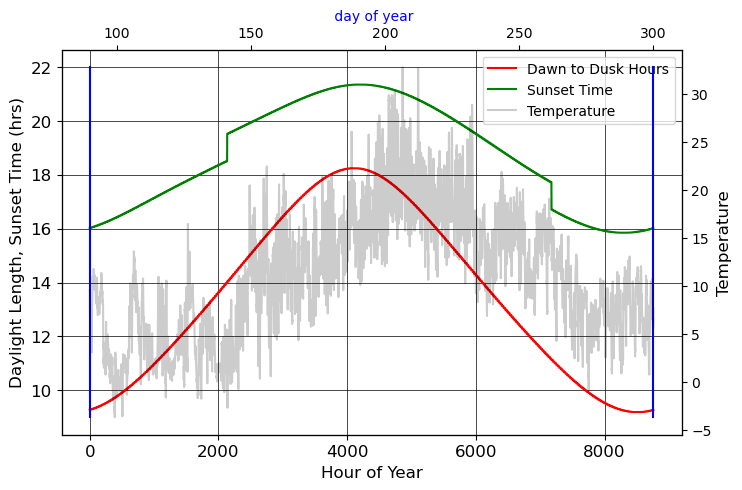

In [ ]:
# get length of day for central London : 51.50° N, 0.125° W
# https://astral.readthedocs.io/en/latest/index.html

from astral import LocationInfo                       # for sunrise and sunset 
from astral.sun import sun  
import pytz
from pytz import timezone

latitude = 51.5
longitude = -0.125

city = LocationInfo("London", "England", "Europe/London", latitude, longitude)

print((
f"Information for {city.name}/{city.region}\n"
f"Timezone: {city.timezone}\n"
f"Latitude: {city.latitude:.02f}; Longitude: {city.longitude:.02f}\n"
))

j=0
hourlyDayLight = np.zeros(len(hours))   # nparray  to hold legth of daylight , etc
hourlySunset = np.zeros(len(hours))
hourOfYear = np.zeros(len(hours))
dayLight = sunset = np.zeros(sum(daynum))

df_LoD = pd.DataFrame()

for j,ind in enumerate(dates):  
    date=colsD[j].date()
    # adding the tzinfo bit in next line was the KEY step to get DST in curve 
    s = sun(city.observer, date,tzinfo=city.timezone) 
    dayLight[j] = (s["dusk"]-s["dawn"]).seconds/3600
    sunset[j] = s["sunset"].hour + (s["sunset"].minute)/60 + (s["sunset"].second)/3600   # get sunset as decimal TZ(UTC) hr
    for k in range(24):
        hr = (j*24)+k
        hourOfYear[hr] = hr
        hourlyDayLight[hr] = (s["dusk"]-s["dawn"]).seconds/3600
        hourlySunset[hr] = s["sunset"].hour + (s["sunset"].minute)/60 + (s["sunset"].second)/3600   # get sunset as decimal TZ(UTC) hr
    #if j%30 == 0:
    #    print(f'Date: {date}',f'Dawn: {s["dawn"]} ',f'Dusk: {s["dusk"]}',f'Sunset:{s["sunset"]}')  

print("Lengths: hourOfYear {0}, hourlyDayLight {1}, hourlySunset {2}".format(len(hourOfYear),len(hourlyDayLight),len(hourlySunset)))
df_LoD = pd.DataFrame({'hourOfYear':hourOfYear,'dayLight':hourlyDayLight,'sunset':hourlySunset},\
                      columns=['hourOfYear','dayLight','sunset'])

#df_LoD.to_csv('../project_data/intermediateDataLCL/London_LengthOfDayData.csv')  
    
# plot daylight , sunset etc

fig = plt.figure(figsize=(8,5));
ax1 = fig.add_subplot(111)
it1 = ax1.plot(np.arange(len(hours)), hourlyDayLight, color='r',label='Dawn to Dusk Hours') 
it2 = ax1.plot(np.arange(len(hours)), hourlySunset, color='g',label='Sunset Time')

ax1.set_xlabel('Hour of Year', fontsize=12)
ax1.set_ylabel('Daylight Length, Sunset Time (hrs)', fontsize=12)
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(color='k', linestyle='-', linewidth=0.5)


ax2 = ax1.twiny()  # instantiate a second x axes that shares the same y-axis
ax2.set_xlabel(' day of year', color='b')  # we already handled the y-label with ax1
#ax2.plot(np.arange(len(dates)), sunset, color='g')
ax2.plot(2*[dst_dates[0].dayofyear],[9,22],color='b')
ax2.plot(2*[dst_dates[1].dayofyear],[9,22],color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax3 = ax1.twinx()
it3 = ax3.plot(np.arange(len(hours)), hourlyTemp, color='k',label='Temperature',alpha=0.2)
ax3.set_ylabel('Temperature', fontsize=12)


items = it1+it2+it3
labs = [i.get_label() for i in items]
ax1.legend(items, labs, loc=0);

# restart here 

In [ ]:
# get hourly load data
hourly_df=pd.read_pickle('./project_data/intermediateDataLCL/LCL_hourly_df.pkl')


In [ ]:

# user database cleaning :
# 1) exclude anomalously low usage users (see LCL3

cutoff = 1000  # see LCL3 histograms of annual aggregate consumption by user
lowLoadUsers_df = hourly_df.loc[(hourly_df.sum(axis=1).values < cutoff)]  
print("Number of users with annual aggregate usage < ",cutoff," kWh is : ",lowLoadUsers_df.shape[0])

agg_lowLoadUsers = lowLoadUsers_df.sum(axis=0)    # sum each column ie aggregate of all users in input df
uIDsReject = lowLoadUsers_df.index
uIDsAll = hourly_df.index.values   # get all userIDs

uIDs = [x for x in uIDsAll if x not in uIDsReject]
print("# users retained:",len(uIDs))
hourly_df = hourly_df.loc[uIDs]


Number of users with annual aggregate usage <  1000  kWh is :  11
# users retained: 711


In [ ]:
aggLoad = hourly_df.sum(axis=0)    # sum each column ie aggregate of all users at each time 
aggLoad


2013-01-01 00:00:00    458.542
2013-01-01 01:00:00    379.255
2013-01-01 02:00:00    295.068
2013-01-01 03:00:00    252.970
2013-01-01 04:00:00    230.669
                        ...   
2013-12-31 19:00:00    637.441
2013-12-31 20:00:00    583.995
2013-12-31 21:00:00    517.485
2013-12-31 22:00:00    479.429
2013-12-31 23:00:00    427.385
Length: 8760, dtype: float64

In [ ]:
#get stats of gg Load
aggLoad.describe()

count    8760.000000
mean      346.811860
std       118.837454
min       152.027000
25%       262.866500
50%       330.723500
75%       413.589250
max       781.926999
dtype: float64

In [ ]:
# daily load aggregate - not needed here?
aggLoadDaily = pd.DataFrame(aggLoad.values.reshape(365,24)).sum(axis=1)
aggLoadDaily


0       9933.919997
1       9921.871998
2       9396.279000
3       9411.108999
4       9901.170000
           ...     
360    10035.419000
361     9806.649000
362    10123.249999
363    10020.968998
364     9941.396000
Length: 365, dtype: float64

In [ ]:
# get weather and daylight data (as created above)
hourlyTemp = pd.read_csv('./project_data/intermediateDataLCL/London_Temperature.csv')['temperature']
hourlySunset = pd.read_csv('./project_data/intermediateDataLCL/London_LengthOfDayData.csv')['sunset']
hourlyDayLight = pd.read_csv('./project_data/intermediateDataLCL/London_LengthOfDayData.csv')['dayLight']


In [ ]:
# set up any inputs may need (repeat here even if set above - before 'restart' heading)

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', \
          'November', 'December']
daynum = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dayLabels = ['Mon', 'Tue', 'Wed', 'Thu','Fri','Sat','Sun']
indexVals = aggLoad.index    # index = hr in datetime64ns format  (8760 values)

# set date window of interest
start='1/1/2013'
end='1/1/2014'

# create date df from start to end date
colsD = pd.date_range(start, end, freq='1D')[0:-1]  # returns DatetimeIndex
dates = colsD.date # np array

# create hr df from start to end date
colsT = pd.date_range(start, end, freq='1H')[0:-1]  # returns DatetimeIndex
hours = colsT.hour # np array

# daylight saving start/emd dates
dst_dates=[pd.date_range('31/3/2013', '27/10/2013', freq='1D')[0],\
    pd.date_range('31/3/2013', '27/10/2013', freq='1D')[-1]]
dst_dates

[Timestamp('2013-03-31 00:00:00', freq='D'),
 Timestamp('2013-10-27 00:00:00', freq='D')]

      
# MLR Training & Prediction Features :    
Need (t-168) buffer for naive model       
featureLength = $\sum_{i=1}^{6}$(endPred[i]-(startTrain[i]+168)) 


# Inputs for MLR         
a) Training and Prediction windows       
b) Hour of Day, Day Of Week etc Classifiers          
c) styles and labels          
d) load and environmental data series           


Train on 6 week periods and test on following 2 weeks    
 ie periods will start on same day of week         

 *must run following group of cells to set key parameters*

In [ ]:
# set training and prediction window(s) :  maintain equal lengths for each period..

# preferred configuration: training on 6 periods across full year

nPeriods=6  
nWeeks=8   
trainWeeks=6  
predWeeks=2  

trainConfig = {'nPeriods':nPeriods,'nWeeks':nWeeks,'trainWeeks':trainWeeks,'predWeeks':predWeeks}

In [ ]:
# set Classifiers: HourOfDay, DayOfWeek, Seasonality (PeriodOfYear)

#create HoD (Hour Of Day) classifier - see LCL3 script for analysis
nightTime = np.asarray([23,0,1,2,3,4,5,6])   # ie 2300 to 0700
earlyMorn = np.asarray([7,8,9])              # 0700 to 1000
dayTime = np.asarray([10,11,12,13,14,15])    # 1000 to 1600
eveningTime = np.asarray([16,17,18,19,20,21,22,23])   #1600 to 0000   OVERLAPS WITH nightTime
timeLists = [nightTime, earlyMorn, dayTime, eveningTime]   # list of lists

#create DayOfWeek classifier
dayClassifier = [[1,2,3,4],[5,6,0]]

# create PeriodOfYear classifier: h1 and h2 classes for 1st/2md half of year ; see LCL3 script
h1=np.arange(0,sum(daynum[0:6]))
h2=np.arange(sum(daynum[0:6]),sum(daynum[0:12]))


PoYlist=[h1,h2]   # period of year list
#PoYlist


In [ ]:
# alterative period of year config - 6 * 2 month periods ..
# but would need to recode def_allFeatures function to handle more than 6 terms  DONE
# ie for h1,h2 ie 2 period, have 2*(cont,liner,quadratic)  = 6 terms 
# below would have 6*3=18 terms 

#h1=np.arange(0,sum(daynum[0:2]))
#h2=np.arange(sum(daynum[0:2]),sum(daynum[0:4]))
#h3=np.arange(sum(daynum[0:4]),sum(daynum[0:6]))
#h4=np.arange(sum(daynum[0:6]),sum(daynum[0:8]))
#h5=np.arange(sum(daynum[0:8]),sum(daynum[0:10]))
#h6=np.arange(sum(daynum[0:10]),sum(daynum[0:12]))
#PoYlist=[h1,h2,h3,h4,h5,h6] 

# got larger error for forecast with this config - overfitting?

In [ ]:
# Set styles and label classes

lineStyles = ['-','-.',':','--']
lineStyles = ['solid', 'dashdot','dotted', 'dashed']
#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html


lineColors = ['k','b','g','r','m','c']    

myStyles = {'lineStyles':lineStyles,'lineColors':lineColors}

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', \
          'September', 'October','November', 'December']
daynum = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dayLabels = ['Mon', 'Tue', 'Wed', 'Thu','Fri','Sat','Sun']
calVars = {'months':months,'daynum':daynum,'dayLabels':dayLabels}

for key in calVars.keys():
    print(key,'->',calVars[key])

for val in calVars.values():
    print(val)

months -> ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
daynum -> [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
dayLabels -> ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


In [ ]:
# PREPARE INPUTS 1:  - only need to do once for each trainConfig 

# Set windows and series lengths for each startTrain(i)+168 : end Pred(i))
# windowS contents = INDICES

featureLength,trainLength,predLength = 0,0,0
windows=np.zeros((nPeriods,4),dtype=np.int)  # to store train and predict windows

# loop through all periods, set training and prediction windows in each 

for i in range(nPeriods):       # e.g. 6 periods of 8 weeks in year
    startTrain = np.int(i*(nWeeks*7)*24)                     # start of each period
    endTrain = np.int( ((i*(nWeeks*7)+ (trainWeeks*7))*24))  # end of each training period
    startPred = endTrain
    endPred = np.int((i+1)*(nWeeks*7)*24)
    #print("startTrain:",startTrain,"endTrain:",endTrain,"startPred: ",startPred,"endPred: ",endPred)

    # train features start at startTrain+168 to capture aggLoad(t-168) data from TRAINING window only
    featureLength += (endPred-(startTrain+168))     # combined training+predict features
    trainLength += (endTrain-(startTrain+168))
    predLength += (endPred-startPred)     
 
    windows[i,0]= startTrain; windows[i,1]= endTrain
    windows[i,2]= startPred;  windows[i,3]= endPred
    
print("Totals: featureLength: ",featureLength,"trainLength: ",trainLength,"predLength: ",predLength)


Totals: featureLength:  7056 trainLength:  5040 predLength:  2016


In [ ]:
print(windows)   # indices =  hour of year  
print(len(windows)) # number of periods.

[[   0 1008 1008 1344]
 [1344 2352 2352 2688]
 [2688 3696 3696 4032]
 [4032 5040 5040 5376]
 [5376 6384 6384 6720]
 [6720 7728 7728 8064]]
6


In [ ]:
# colate environmental series for train and test windows: for each startTrain(i)+168 : end Test(i))
# 'ALL' arg => collate train+test in one section for MLR inputs
envSeries = set_envSeries(windows,'ALL',temp=hourlyTemp,dayLight=hourlyDayLight,sunset=hourlySunset)

for k,v in envSeries.items():
    print("env series:{0},length:{1},type:{2},first val:{3}".format(k,len(v),type(v),v[0]))


env series:temp,length:7056,type:<class 'numpy.ndarray'>,first val:9.06
env series:dayLight,length:7056,type:<class 'numpy.ndarray'>,first val:9.438055555555557
env series:sunset,length:7056,type:<class 'numpy.ndarray'>,first val:16.175555555555555


# Define load series to use 

Funtion *set_loadSeries* returns dictionary of modified load pd.Series 

 windows = list of start/stop hour of year indices defining each training / prediction window    
 load = input load series e.g. aggregate load     

https://www.geeksforgeeks.org/python-initializing-dictionary-with-empty-lists/


In [ ]:
# define and print inputs to set_loadSeries function . MUST have 'yData','yDataTrain','yDataTest'. 
# For MLR, other series are needed JUST FOR PLOTTING and error computation? 
#          actual input time history series to regression are computed in populate_AllFeatures function

loadSeriesList = ['yData',\
                  'yDataTrain','SN24train','SN25train','SN26train','SN168train',\
                  'yDataTest','SN24test','SN25test','SN26test','SN168test']        # set load series names 
# count number of train (and test) series:
numSeries=0
for series in loadSeriesList:
    if ('train' in series) or ('Train' in series):
        numSeries+=1
print("numSeries:",numSeries)

loadSeriesOffsetsWinStart = [168] + [168]*numSeries + [0]*numSeries  # set offsets from each window start (max time lag=168)
loadSeriesLags = [0]+[0,24,25,26,168]*2                              # set lag terms for each load series (t-lag)
loadSeriesWindows  = np.array([0,3]+[0,1]*numSeries+[2,3]*numSeries).reshape(-1,2)    # set windows for each series range


print("loadSeriesList: {0}".format(loadSeriesList))
print("loadSeriesOffsetsWinStart: {0}".format(loadSeriesOffsetsWinStart))    
print("loadSeriesLagsWinEnd: {0}".format(loadSeriesLags))
print("loadSeriesWindows: \nstart window indices:{0}, \nend window indices:{1}".format\
      (loadSeriesWindows[:,0],loadSeriesWindows[:,1]))


numSeries: 5
loadSeriesList: ['yData', 'yDataTrain', 'SN24train', 'SN25train', 'SN26train', 'SN168train', 'yDataTest', 'SN24test', 'SN25test', 'SN26test', 'SN168test']
loadSeriesOffsetsWinStart: [168, 168, 168, 168, 168, 168, 0, 0, 0, 0, 0]
loadSeriesLagsWinEnd: [0, 0, 24, 25, 26, 168, 0, 24, 25, 26, 168]
loadSeriesWindows: 
start window indices:[0 0 0 0 0 0 2 2 2 2 2], 
end window indices:[3 1 1 1 1 1 3 3 3 3 3]


In [ ]:
# colate load series for train and predict windows

loadSeries = set_loadSeries(windows,aggLoad,loadSeriesList,loadSeriesOffsetsWinStart,loadSeriesLags,\
                   loadSeriesWindows,'print_output')  # return dictionary of all load series 

for k,v in loadSeries.items():
    print("{0} of length {1},{2}".format(k,len(v),type(v)))

series: yData: append input load for windows(0,0)+168-0:windows(0,3)-0
series: yDataTrain: append input load for windows(0,0)+168-0:windows(0,1)-0
series: SN24train: append input load for windows(0,0)+168-24:windows(0,1)-24
series: SN25train: append input load for windows(0,0)+168-25:windows(0,1)-25
series: SN26train: append input load for windows(0,0)+168-26:windows(0,1)-26
series: SN168train: append input load for windows(0,0)+168-168:windows(0,1)-168
series: yDataTest: append input load for windows(0,2)+0-0:windows(0,3)-0
series: SN24test: append input load for windows(0,2)+0-24:windows(0,3)-24
series: SN25test: append input load for windows(0,2)+0-25:windows(0,3)-25
series: SN26test: append input load for windows(0,2)+0-26:windows(0,3)-26
series: SN168test: append input load for windows(0,2)+0-168:windows(0,3)-168
yData of length 7056,<class 'pandas.core.series.Series'>
yDataTrain of length 5040,<class 'pandas.core.series.Series'>
SN24train of length 5040,<class 'pandas.core.series

In [ ]:
hourlyTemp

0       9.57
1       9.38
2       9.18
3       7.88
4       7.38
        ... 
8755    6.67
8756    5.62
8757    5.97
8758    6.67
8759    7.68
Name: temperature, Length: 8760, dtype: float64

In [ ]:
# check for correct times etc
for series,vals in loadSeries.items():
    print(series)
    print(vals.head(2))

yData
2013-01-08 00:00:00    399.409999
2013-01-08 01:00:00    304.623000
dtype: float64
yDataTrain
2013-01-08 00:00:00    399.409999
2013-01-08 01:00:00    304.623000
dtype: float64
SN24train
2013-01-07 00:00:00    407.228
2013-01-07 01:00:00    311.524
dtype: float64
SN25train
2013-01-06 23:00:00    390.128
2013-01-07 00:00:00    407.228
dtype: float64
SN26train
2013-01-06 22:00:00    505.727
2013-01-06 23:00:00    390.128
dtype: float64
SN168train
2013-01-01 00:00:00    458.542
2013-01-01 01:00:00    379.255
dtype: float64
yDataTest
2013-02-12 00:00:00    443.391001
2013-02-12 01:00:00    348.817000
dtype: float64
SN24test
2013-02-11 00:00:00    443.533001
2013-02-11 01:00:00    335.983000
dtype: float64
SN25test
2013-02-10 23:00:00    435.633001
2013-02-11 00:00:00    443.533001
dtype: float64
SN26test
2013-02-10 22:00:00    545.447999
2013-02-10 23:00:00    435.633001
dtype: float64
SN168test
2013-02-05 00:00:00    420.232000
2013-02-05 01:00:00    323.048001
dtype: float64


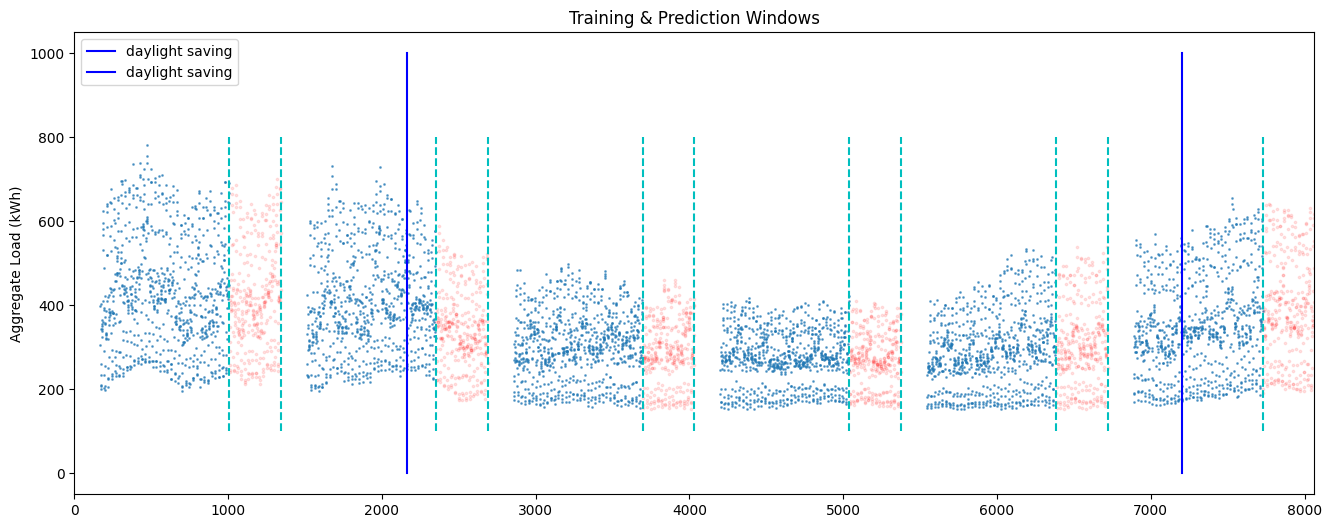

Hour of Year range: 168 8064


In [ ]:
# Plot TRAINING and PREDICTION windows with semi-transparent scatter plot of load data

# construct constant series to show ranges of training and prediction windows
df = pd.DataFrame(index=(loadSeries['yDataTrain'].index).union(loadSeries['yDataTest'].index)) 
df['hourOfYear']=((df.index.dayofyear-1)*24)+df.index.hour
df1 = df.loc[loadSeries['yDataTrain'].index, :] 
df1['flg']=1
df1['hourOfYear']=((df1.index.dayofyear-1)*24)+df1.index.hour

df2 = df.loc[loadSeries['yDataTest'].index, :] 
df2['flg']=2
df2['hourOfYear']=((df2.index.dayofyear-1)*24)+df2.index.hour
df = pd.concat([df1,df2])

# plot a) data b)  window ranges
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(111)

if len(windows)<=1:
    ax1.plot(df1['hourOfYear'],loadSeries['yDataTrain'].values,alpha=0.6)    
    ax1.plot(df2['hourOfYear'],loadSeries['yDataTest'].values,alpha=0.1,color='r') 
else:
    ax1.scatter(df1['hourOfYear'],loadSeries['yDataTrain'].values,s=1,alpha=0.6)
    ax1.scatter(df2['hourOfYear'],loadSeries['yDataTest'].values,alpha=0.1,s=3,color='r')


# add train and predict windows
yLim = get_limits(loadSeries['yData'], decimals=-2)     
for w,win in enumerate(windows):
    ax1.plot(2*[win[0]],[yLim[0],yLim[1]],color='c',linestyle='--')
    ax1.plot(2*[win[1]],[yLim[0],yLim[1]],color='c',linestyle='--')    
    
#add Daylight saving start/end dates
for d,date in enumerate(dst_dates):
    ax1.plot(2*[24*(date.dayofyear)],[0,1000],color='b',label='daylight saving')
    #ax1.plot(2*[24*(date.dayofyear)],[0,1000],color='y',label=legLabels[d])

ax1.set_ylabel('Aggregate Load (kWh)')  
ax1.set_title('Training & Prediction Windows')


ax1.set_xlim(0,df['hourOfYear'].max()+1)
ax1.legend()
plt.show()
del df1,df2

print("Hour of Year range:",df['hourOfYear'].min(),df['hourOfYear'].max()+1)
            

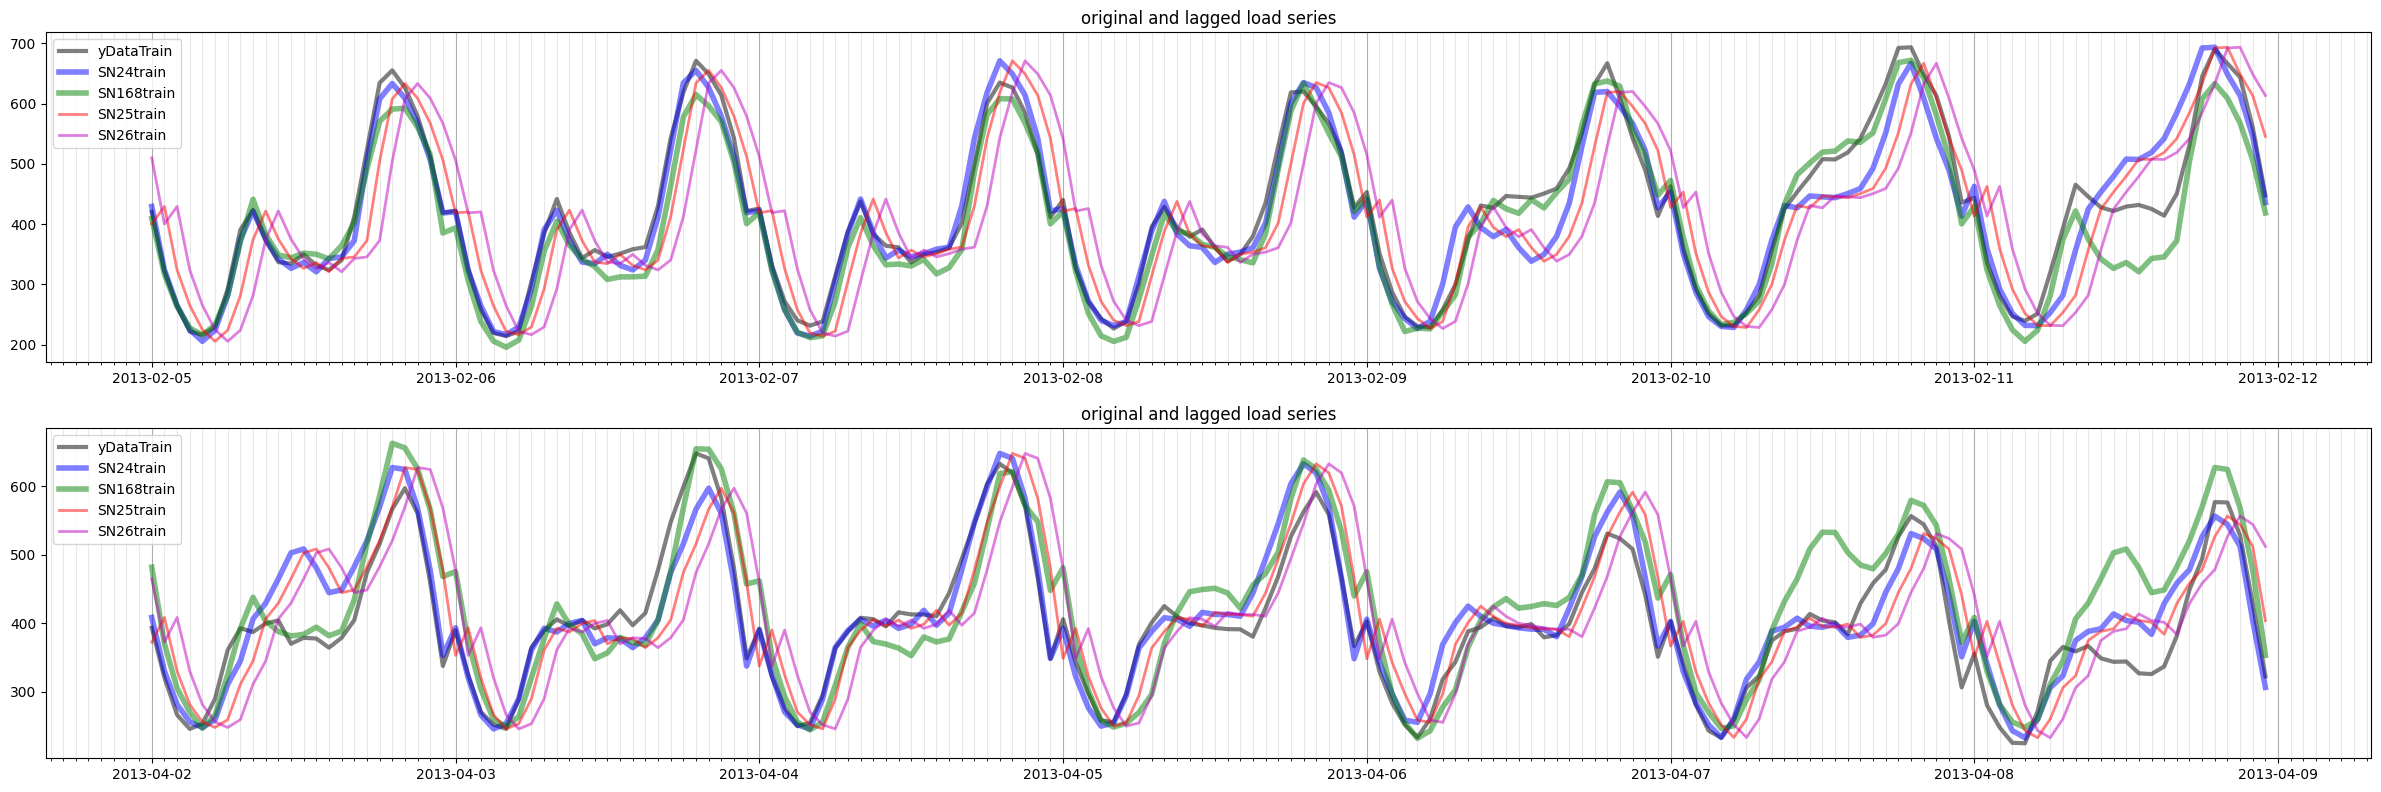

In [ ]:
# plot t-24, etc load series

# shift predictions to align with hr/day indices ie unpack into actual time bands
loadSeries_plot = np.empty_like(aggLoad)
loadSeries_plot[:] = np.nan
lengthTrainSum,lengthTestSum = 0,0

#num windows to plot
numPlots=2
fig = plt.figure(figsize=(30,15*numPlots))
lineWidths = [3,4,4,2,2]
axs = []

# portion of windows to plot (relative to end of training )
lhs=-168
rhs=0

for i in range(len(windows)): 
    lengthTrain     = windows[i,1]-(windows[i,0]+168)
    lengthTest      = windows[i,3]-(windows[i,2])
    if i< numPlots:
        axs.append(fig.add_subplot(len(windows),1,i+1))
  
    for j,series in enumerate(['yDataTrain','SN24train','SN168train','SN25train','SN26train']):
        loadSeries_plot[(windows[i,0]+168):windows[i,1]]  = np.squeeze(loadSeries[series][lengthTrainSum:lengthTrainSum+lengthTrain])       
        if i<numPlots:
            axs[i].plot(aggLoad[windows[i,1]+lhs:windows[i,1]+rhs].index,loadSeries_plot[windows[i,1]+lhs:windows[i,1]+rhs], label=series, color=lineColors[j],alpha=0.5,linewidth = lineWidths[j]);
            axs[i].legend(loc='best')
            axs[i].xaxis.set_major_locator(MultipleLocator(1))
            axs[i].xaxis.set_minor_locator(MultipleLocator(1/24))
            axs[i].grid(b=True, which='major', axis='x',alpha=1) 
            axs[i].grid(b=True, which='minor', axis='x',alpha=0.3) 
            axs[i].set_title('original and lagged load series')

    lengthTrainSum += lengthTrain
    lengthTestSum += lengthTest
    

note from above plot:
- Plotting loadSeries dictionary : train series
- yDataTrain,SN24train,SN168train peaks aligned (on avg), see expected 1,2 hr shift in SN25train,SN26train

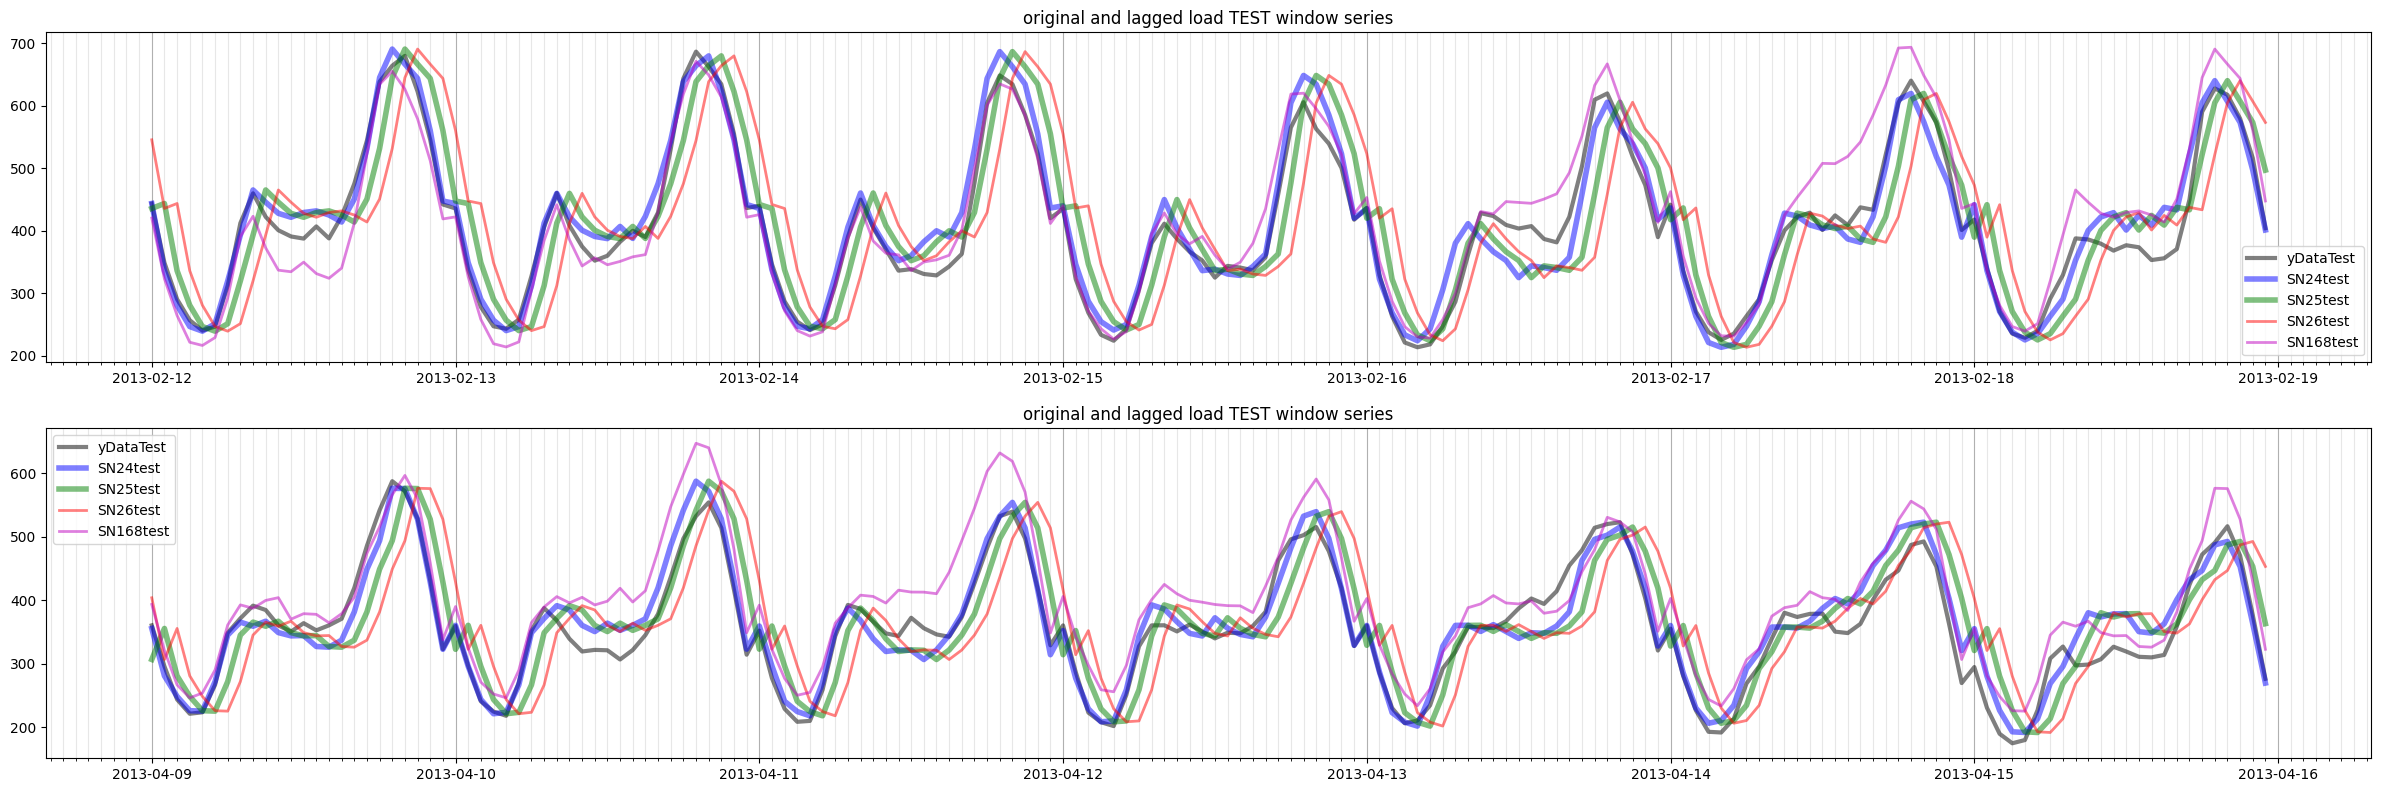

In [ ]:
# now plot TEST windows

# plot t-24, etc load series

# shift predictions to align with hr/day indices ie unpack into actual time bands
loadSeries_plot = np.empty_like(aggLoad)
loadSeries_plot[:] = np.nan
lengthTrainSum,lengthTestSum = 0,0

#num windows to plot
numPlots=2
fig = plt.figure(figsize=(30,15*numPlots))
axs = []

# portion of windows to plot (relative to end of training )
lhs=0
rhs=168

for i in range(len(windows)): 
    lengthTrain     = windows[i,1]-(windows[i,0]+168)
    lengthTest      = windows[i,3]-(windows[i,2])
    if i< numPlots:
        axs.append(fig.add_subplot(len(windows),1,i+1))
  
    for j,series in enumerate(['yDataTest','SN24test','SN25test','SN26test','SN168test']):     #['yDataTest','SN24test','SN168test','SN25test','SN26test'])
        loadSeries_plot[(windows[i,2]):windows[i,3]]  = np.squeeze(loadSeries[series][lengthTestSum:lengthTestSum+lengthTest])       
        if i<numPlots:
            axs[i].plot(aggLoad[windows[i,2]+lhs:windows[i,2]+rhs].index,loadSeries_plot[windows[i,2]+lhs:windows[i,2]+rhs], label=series, color=lineColors[j],alpha=0.5,linewidth = lineWidths[j]);
            axs[i].legend(loc='best')
            axs[i].xaxis.set_major_locator(MultipleLocator(1))
            axs[i].xaxis.set_minor_locator(MultipleLocator(1/24))
            axs[i].grid(b=True, which='major', axis='x',alpha=1) 
            axs[i].grid(b=True, which='minor', axis='x',alpha=0.3) 
            axs[i].set_title('original and lagged load TEST window series')

    lengthTrainSum += lengthTrain
    lengthTestSum += lengthTest
    

# MLR - set up training inputs 
     
  12 HoD/Temperature terms: (3 for each of 4 HoD bands) i.e. 1,T,T^2    
 6 OPTIONAL PoY/Daylight terms: (3 for each of 2 PeriodOfYear bands) i.e. 1,D,D^2    
 6 DayOfWeek terms: 2 x contant terms ; 2 x 24 lag terms (ie Tues-Fri and Sat-Mon); 2 x 168 lag terms     
(all $\beta $ terms initially 1 by default )  



# SKIP DOWN TO "## Now run everything in one cell" 
(IF WISH TO RUN EVERYTHING IN ONE GO, rather than step by step as follows:)



*populate the allFeatures  array:*          
Set input terms etc where t-24,t-168 loads read from aggLoad for e.g. week 1to7 of each period        
Want allFeatures to contain just the training (e.g. weeks 2to6) and prediction (e.g. w7-8) periods, dropping week 1 


#Update nEnvTerms and nDoWterms each time!

In [ ]:
#nEnvTerms = 12,18 etc   
# 12 for TempUnaware and  TempQuadratic 
# 18 for Temp+DayLight quadratic i.e. 3*4 ToD terms + 2 (PoY) *3 LoD terms
# 30 where testing 6 PoY divisions (instead of 2) *3 LoD terms  

nEnvTerms = 12   # min of 12 since code requires Temp HoD terms to be set even if not used (eg for Temp unaware model)



In [ ]:
#  nDoWterms : 
# 6 for 'base case' ie t-24,t-168 ; 
# 10 if add t-25,t-26

nDoWterms = 6  # number of DayOfWeek terms

In [ ]:
#populate allFeatures np array for aggregate forecast case  : this is where choose input lags to use

#base case : 6 DoW terms :DoW class*(1, t-24,t-168)
if nDoWterms == 6:
    allFeatures = populate_AllFeatures(windows,featureLength,loadSeries['yData'],aggLoad,\
                         envSeries['temp'],dayClassifier,timeLists,nEnvTerms ,PoY=PoYlist,LoD=envSeries['dayLight'],\
                                  lags=[24,168],nDoWterms=6)
elif nDoWterms == 10:       #DoW class*(1, t-24,t-25,t-26,t-168)
    allFeatures = populate_AllFeatures(windows,featureLength,loadSeries['yData'],aggLoad,\
                         envSeries['temp'],dayClassifier,timeLists,nEnvTerms ,PoY=PoYlist,LoD=envSeries['dayLight'],\
                                  lags=[24,25,26,168],nDoWterms=10)
    
allFeatures.shape

(7056, 18)

In [ ]:
# ** SKIP THIS FOR NOW **

# look at how to remove specified days e.g. DST start/emd dates from allFeatures? 
# need to do AFTER populateAllFeatures so that persistance model channels are correctly calculated?


lengthTrainPredSum = 0
yData=loadSeries['yData']

#for date in dst_dates:
#    print("dst date:",date.dayofyear, type(date.dayofyear))

#loop through all windows
for i in range(len(windows)):
    lengthTrainPred = windows[i,3]-(windows[i,0]+168)    # exclude 1st 168 hrs to allow for t-168 load
    #print(" lengthTrainPred {0} ({1}) ".format(lengthTrainPred,lengthTrainPred/(24*7)))
    for j in range(lengthTrainPredSum,lengthTrainPredSum+lengthTrainPred):    
        l = j - lengthTrainPredSum                       # relative index within each period

        hourTrain = yData.index[j].hour                   # for Hour of Day classifier
        dayTrain = yData.index[j].dayofweek              # for DoW classifier
        dayOfYear = yData.index[j].timetuple().tm_yday    # for Day of Year classifier
        
        #if hourTrain == 0:
        #    print(hourTrain,dayTrain,dayOfYear)
        for date in dst_dates:
            if (date.dayofyear == dayOfYear):
                print("hour index {0} in dayOfWeek {1} , day of year {2} is a dst date; trainPredData indx j {3}, rel idx in 7 week window l {4} ".format(hourTrain,dayTrain,dayOfYear,j,l))
    lengthTrainPredSum += lengthTrainPred
        


#print(dayOfYear,type(dayOfYear))

hour index 0 in dayOfWeek 6 , day of year 90 is a dst date; trainPredData indx j 1800, rel idx in 7 week window l 624 
hour index 1 in dayOfWeek 6 , day of year 90 is a dst date; trainPredData indx j 1801, rel idx in 7 week window l 625 
hour index 2 in dayOfWeek 6 , day of year 90 is a dst date; trainPredData indx j 1802, rel idx in 7 week window l 626 
hour index 3 in dayOfWeek 6 , day of year 90 is a dst date; trainPredData indx j 1803, rel idx in 7 week window l 627 
hour index 4 in dayOfWeek 6 , day of year 90 is a dst date; trainPredData indx j 1804, rel idx in 7 week window l 628 
hour index 5 in dayOfWeek 6 , day of year 90 is a dst date; trainPredData indx j 1805, rel idx in 7 week window l 629 
hour index 6 in dayOfWeek 6 , day of year 90 is a dst date; trainPredData indx j 1806, rel idx in 7 week window l 630 
hour index 7 in dayOfWeek 6 , day of year 90 is a dst date; trainPredData indx j 1807, rel idx in 7 week window l 631 
hour index 8 in dayOfWeek 6 , day of year 90 is 

7056


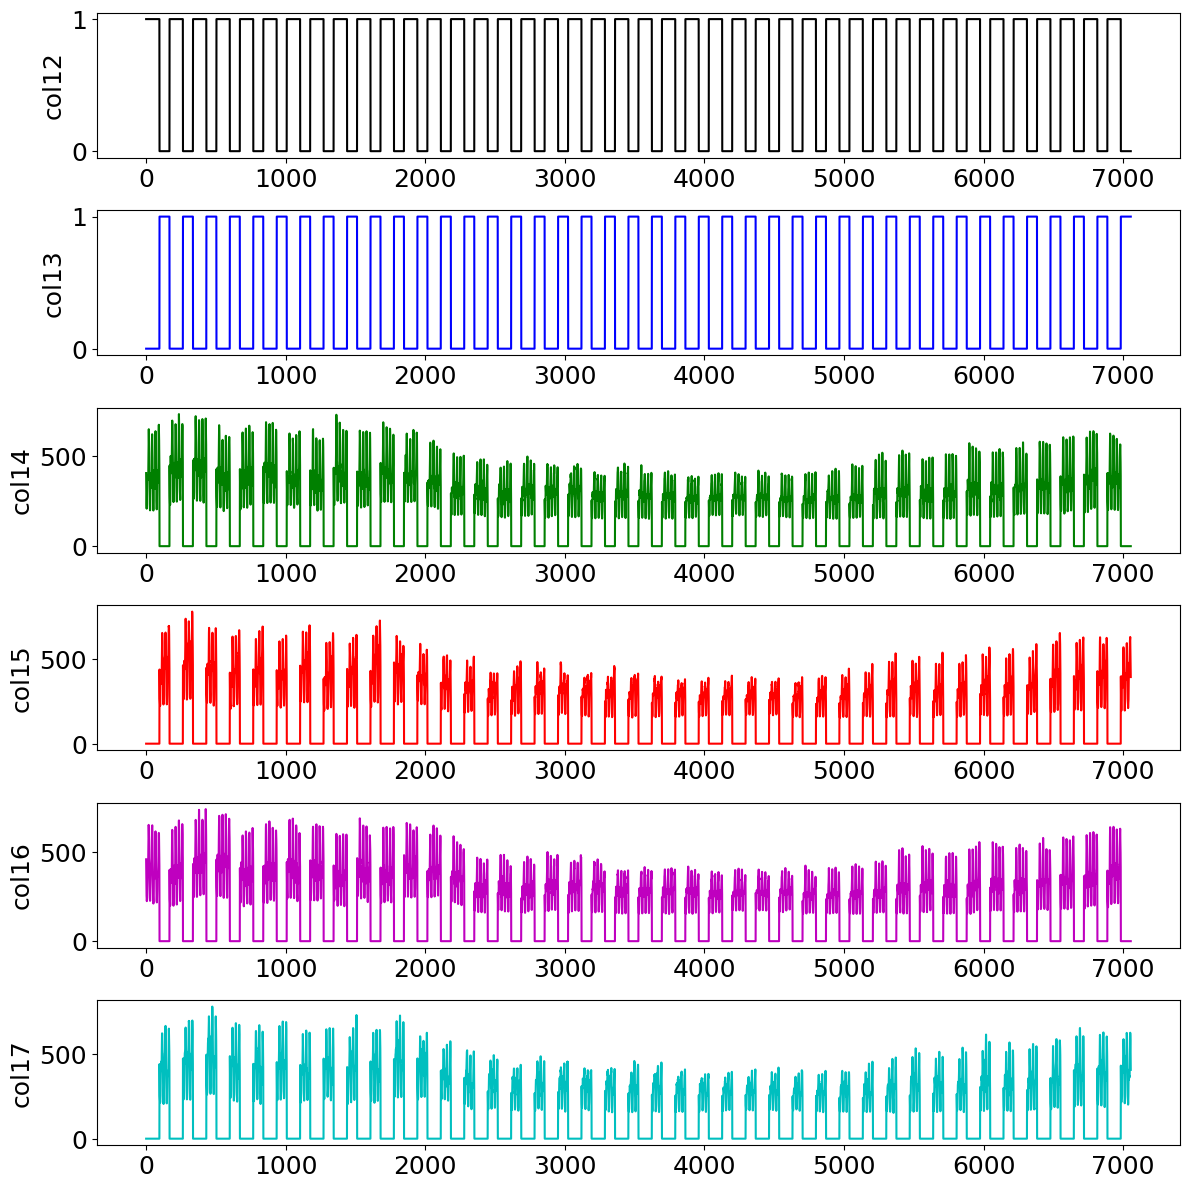

In [ ]:
# plot 6 DoW terms of allFeaturesTrain - error checking
#plot_allFeatures(nEnvTerms,nDoWterms,allFeatures,windowLength=2*168)
plot_allFeatures(nEnvTerms,nDoWterms,allFeatures) 

7056


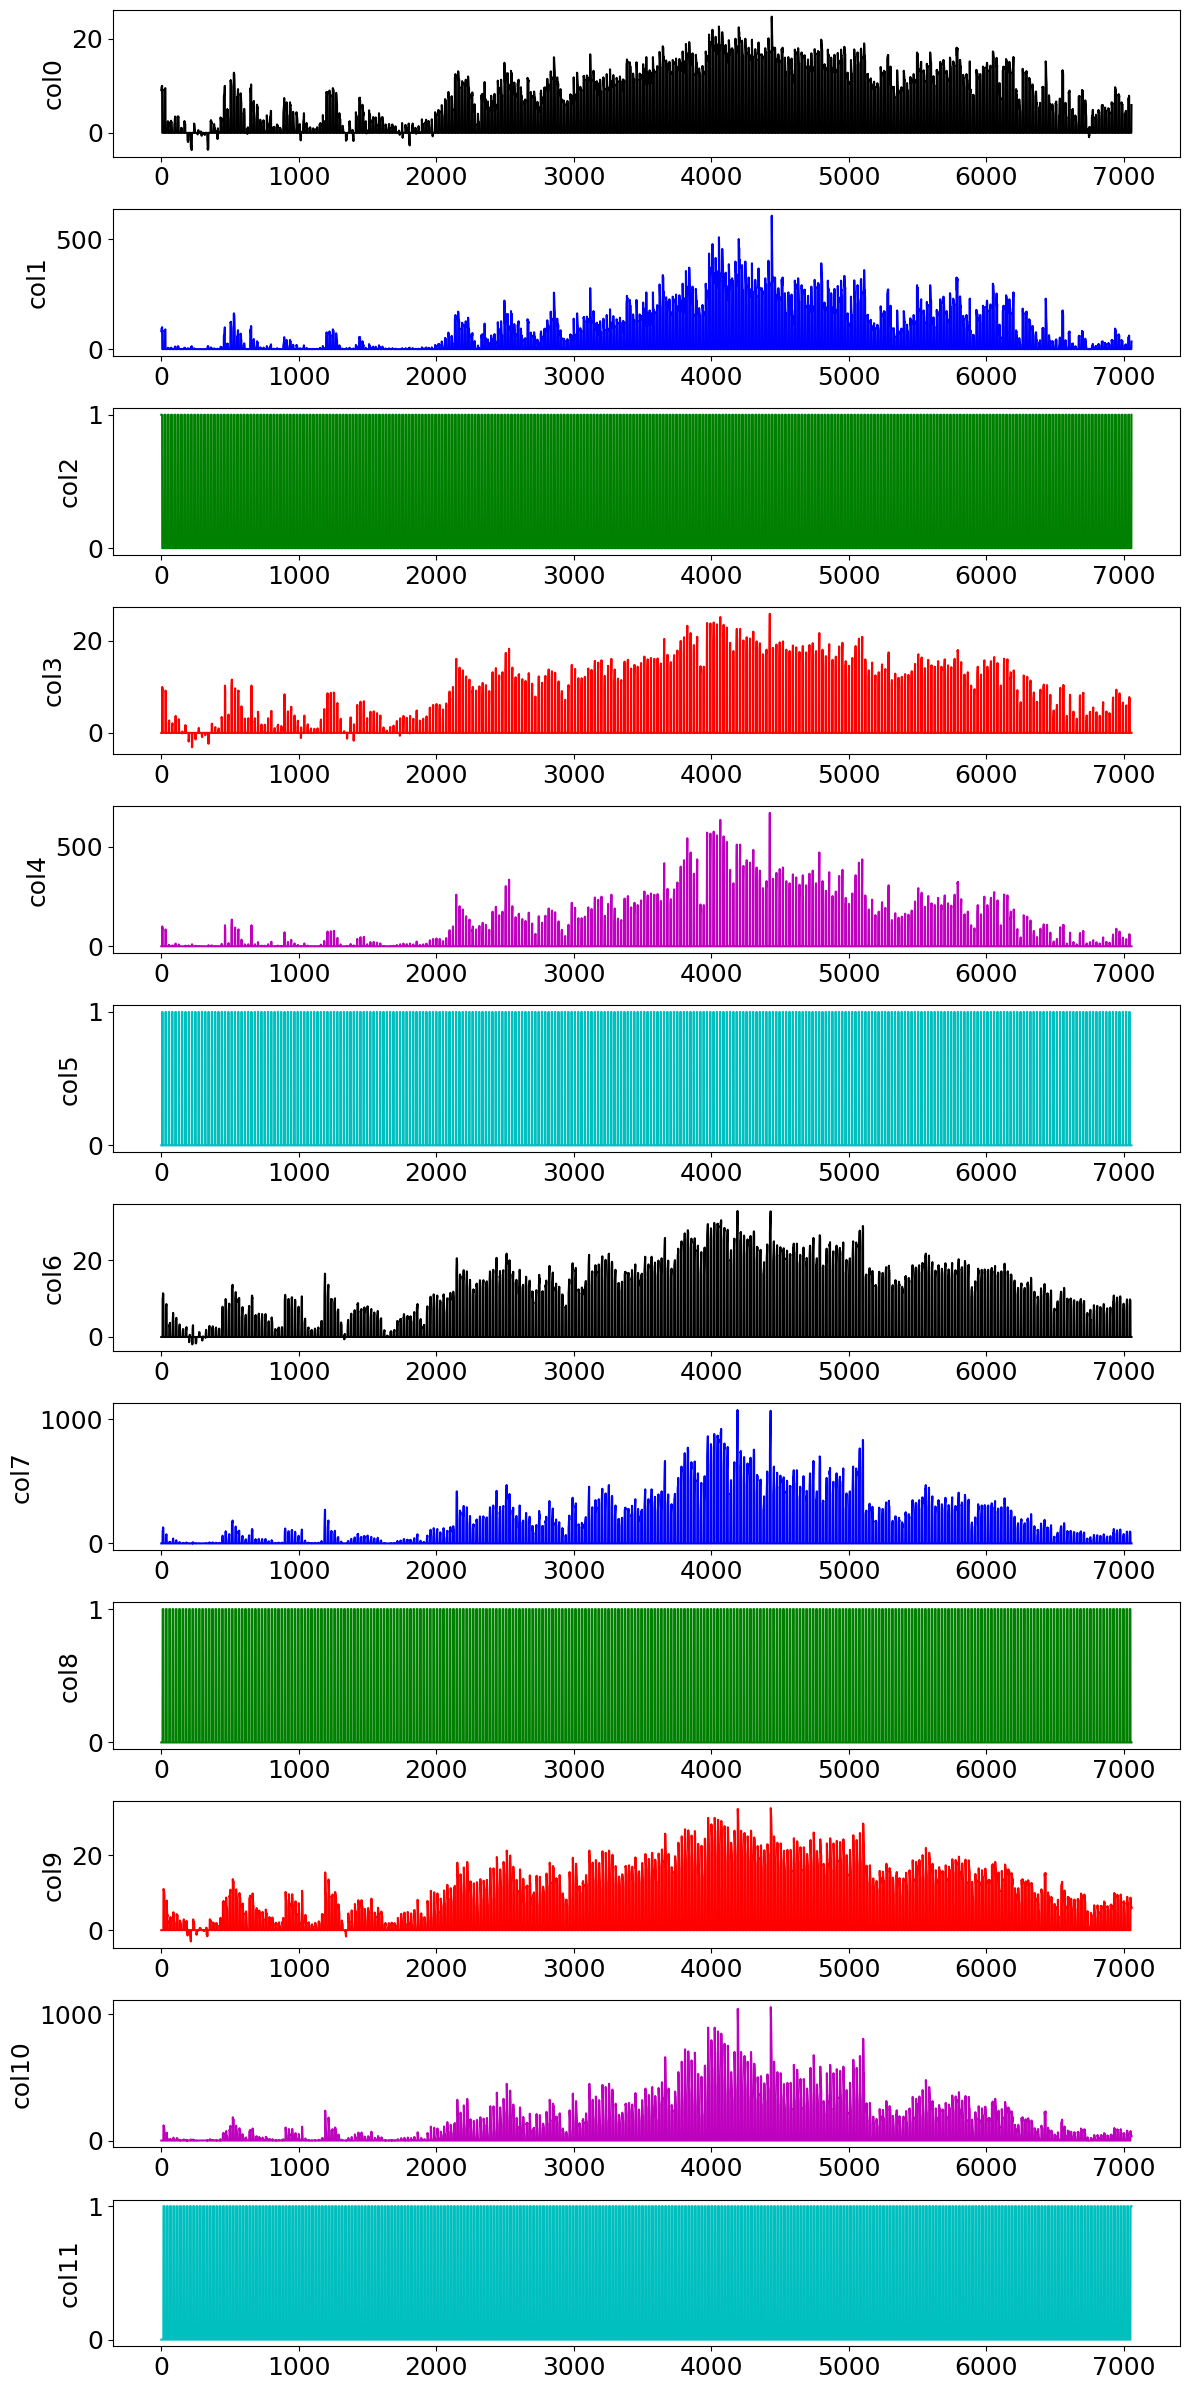

In [ ]:
# plot 12 env terms of allFeaturesTrain - error checking : should have for each of 4 TimeOfDay classes, T,T^2,constant etc
plot_allFeatures(0,nEnvTerms,allFeatures) #windowLength=2*168) 

In [ ]:
# populate allFeatures for individual users 
# redo sometime (see LCL2)

**Training & Prediction Data Split**

Recall: allFeatures has len(windows)*(trainLengthInd+predLengthInd) rows       
       
for each period:            
    trainLength += (endTrain-(startTrain+168))           
    predLength += (endPred-startPred)


In [ ]:
allFeaturesTrain,allFeaturesPredict = create_TrainPredictSeries(trainLength,predLength,allFeatures,windows,nEnvTerms,nDoWterms,'print_output')

lengthTrain 840 lengthPred 336 lengthTrainPred 1176 (7.0 weeks)
lengthTrain 840 lengthPred 336 lengthTrainPred 1176 (7.0 weeks)
lengthTrain 840 lengthPred 336 lengthTrainPred 1176 (7.0 weeks)
lengthTrain 840 lengthPred 336 lengthTrainPred 1176 (7.0 weeks)
lengthTrain 840 lengthPred 336 lengthTrainPred 1176 (7.0 weeks)
lengthTrain 840 lengthPred 336 lengthTrainPred 1176 (7.0 weeks)


In [ ]:
allFeaturesTrain
allFeaturesTrain.shape


(5040, 18)

**Now make the models: **    
LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.    

 Get model coefficients, intercept  & run model on training data to get R2 coefficient

5040
2016


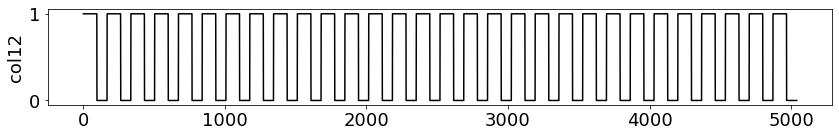

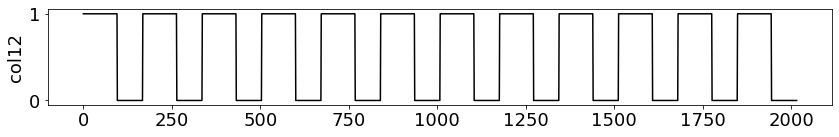

In [ ]:
# plot day class of allFeaturesTrain - error checking
plot_allFeatures(nEnvTerms,1,allFeaturesTrain)

# plot day class of allFeaturesPredict - error checking
plot_allFeatures(nEnvTerms,1,allFeaturesPredict)

In [ ]:
#type(allFeaturesTrain)
#np.savetxt("./allFeaturesTrain.csv", allFeaturesTrain, delimiter=",")
#np.savetxt("./yDataTrain.csv",(loadSeries['yDataTrain'].values), delimiter = ",")

In [ ]:
# run MLR training for model with Quadratic environment variable dependency 
clfQuadraticTemp,trainQuadraticTemp = mlr_train('QuadraticTemp',allFeaturesTrain,\
                                                loadSeries['yDataTrain'],'print_output')      


Regression Model coefficients: 
 [-2.84394763  0.10771721 -6.47827347 -2.99244951  0.07961721 12.22160271
 -4.81507678  0.11758659 29.64571598 -3.98154043  0.07781055 42.434417
  1.00088807 -1.00088807  0.66397669  0.31676228  0.19333694  0.5547458 ]
Regression Model Intercept: 53.03325524452043
R2 coefficient:  0.9585212222411976


In [ ]:
# run MLR training for 'Unaware;' model i.e. with NO environment variable dependency 
clfTempUnaware,trainTempUnaware = mlr_train('TempUnaware',allFeaturesTrain[:,nEnvTerms:], \
                                            loadSeries['yDataTrain'],'print_output')      


Regression Model coefficients: 
 [ 1.66157824 -1.66157824  0.79385259  0.41588795  0.18501127  0.57743869]
Regression Model Intercept: 5.293682986198803
R2 coefficient:  0.9527883086786716


In [ ]:
aggLoad
allFeaturesTrain[:,nEnvTerms:]
allFeaturesPredict[:,nEnvTerms:]

array([[  1.       ,   0.       , 443.5330009,   0.       , 420.2320003,
          0.       ],
       [  1.       ,   0.       , 335.9830003,   0.       , 323.0480007,
          0.       ],
       [  1.       ,   0.       , 280.6740001,   0.       , 264.315    ,
          0.       ],
       [  1.       ,   0.       , 246.649    ,   0.       , 221.521    ,
          0.       ],
       [  1.       ,   0.       , 239.2499996,   0.       , 216.3820003,
          0.       ],
       [  1.       ,   0.       , 251.2530002,   0.       , 229.0249999,
          0.       ],
       [  1.       ,   0.       , 319.6370003,   0.       , 292.1409997,
          0.       ],
       [  1.       ,   0.       , 393.0800005,   0.       , 390.5739995,
          0.       ],
       [  1.       ,   0.       , 465.1670002,   0.       , 423.0639997,
          0.       ],
       [  1.       ,   0.       , 445.5680013,   0.       , 372.5059998,
          0.       ],
       ...,
       [  0.       ,   1.       ,   0.

In [ ]:
# save the training data to create a NN
with open('./project_data/intermediateDataLCL/aggTrainingData.pickle', 'wb') as f:
    pickle.dump(allFeaturesTrain, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('./project_data/intermediateDataLCL/aggTestingData.pickle', 'wb') as f:
    pickle.dump(allFeaturesPredict, f, protocol=pickle.HIGHEST_PROTOCOL)
with open('./project_data/intermediateDataLCL/aggLoad.pickle', 'wb') as f:
    pickle.dump(aggLoad, f, protocol=pickle.HIGHEST_PROTOCOL)

#save load data (target)
with open('./project_data/intermediateDataLCL/aggLoadTraining.pickle', 'wb') as f:
    pickle.dump( loadSeries['yDataTrain'], f, protocol=pickle.HIGHEST_PROTOCOL)
with open('./project_data/intermediateDataLCL/aggLoadTesting.pickle', 'wb') as f:
    pickle.dump( loadSeries['yDataTest'], f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# save version of training data for unware model ie only 
with open('./project_data/intermediateDataLCL/aggTrainingDataUnaware.pickle', 'wb') as f:
    pickle.dump(allFeaturesTrain[:,nEnvTerms:], f, protocol=pickle.HIGHEST_PROTOCOL)
with open('./project_data/intermediateDataLCL/aggTestingDataUnaware.pickle', 'wb') as f:
    pickle.dump(allFeaturesPredict[:,nEnvTerms:], f, protocol=pickle.HIGHEST_PROTOCOL)

Now look at the results on the (Prediction) validation period : 

In [ ]:
# look at the predicted and actual load for the PREDICTION PERIOD
predictedQuadraticTemp = mlr_predict(clfQuadraticTemp,allFeaturesPredict, loadSeries['yDataTest'])
predictedTempUnaware = mlr_predict(clfTempUnaware,allFeaturesPredict[:,nEnvTerms:nEnvTerms+nDoWterms],loadSeries['yDataTest'])

5040
2016


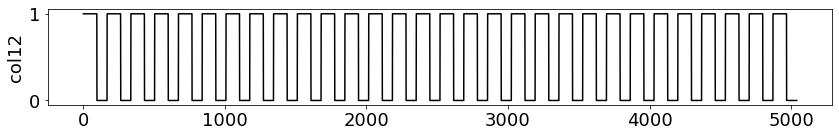

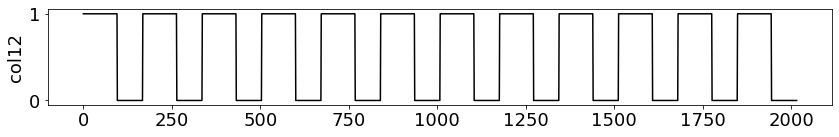

In [ ]:
# plot day class of allFeaturesTrain - error checking
plot_allFeatures(nEnvTerms,1,allFeaturesTrain)
# plot day class of allFeaturesPredict - error checking
plot_allFeatures(nEnvTerms,1,allFeaturesPredict)

 Plot PREDICTED load profiles  

(734876.0, 735204.9583333334)

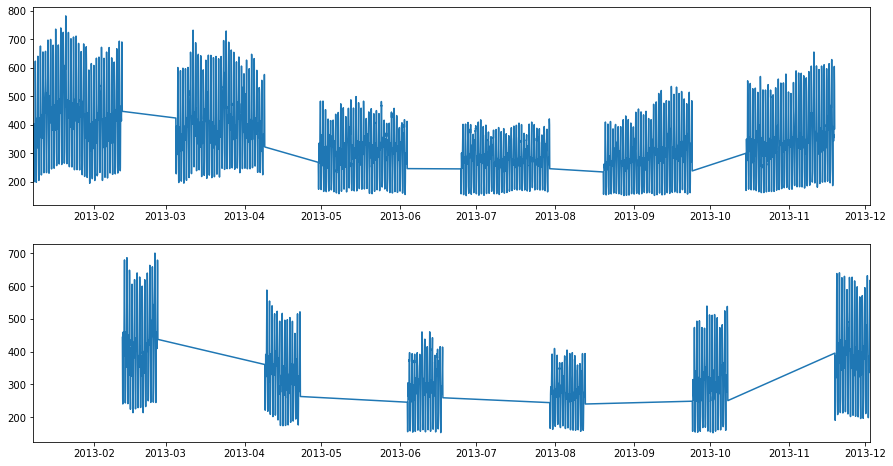

In [ ]:
# quick and dirty plot - load series for training and forecast windows
fig = plt.figure(figsize = (15,8))
xLim=(loadSeries['yData'].index.min(),loadSeries['yData'].index.max())
ax1 = fig.add_subplot(211)
ax1.plot(loadSeries['yDataTrain'].index,loadSeries['yDataTrain'])
ax1.set_xlim(xLim[0],xLim[1])

ax2 = fig.add_subplot(212)
ax2.plot(loadSeries['yDataTest'].index,loadSeries['yDataTest'])
ax2.set_xlim(xLim[0],xLim[1])


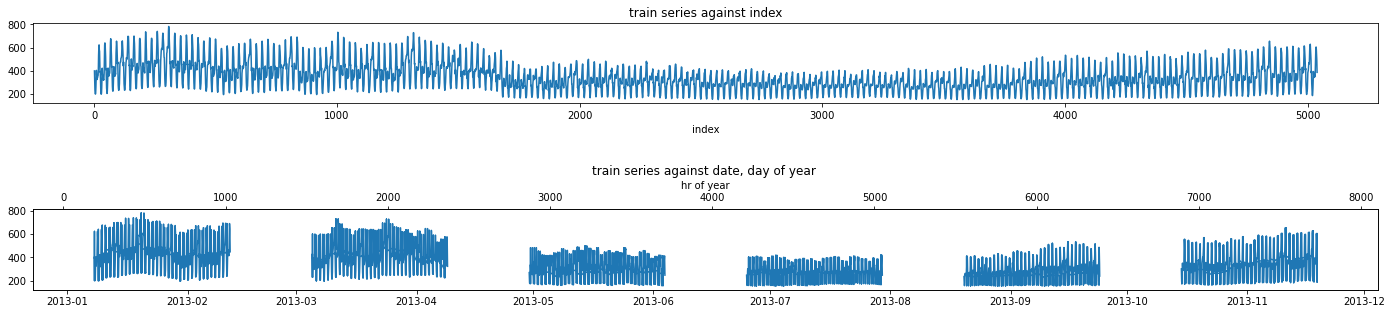

In [ ]:
#shift inputs to actual time bands and plot comparison a) against index b) against date
fig = plt.figure(figsize = (20,5))
axs = fig.add_subplot(211)
axs.plot(np.arange(len(loadSeries['yDataTrain'])),loadSeries['yDataTrain'])
axs.set_title('train series against index')
axs.set_xlabel('index')

plotSeries = shiftInputs(aggLoad,windows,loadSeries['yDataTrain'],trainTestFlg='train')

ax2 = fig.add_subplot(212)
ax2.plot(aggLoad.index,plotSeries)
ax3 = ax2.twiny()
ax3.plot((aggLoad.index.dayofyear*24),plotSeries)
ax3.set_xlabel('hr of year')
ax3.set_title('train series against date, day of year ')
fig.tight_layout(pad=3.0)


relative index : window to plot: [[0, 168], [168, 336]]
Index range to plot : plotStart 6384, plotEnd 6552; days 266.0 to 273.0; weeks 38.0 to 39.0
found startTick 6384 on day 266.0
Index range to plot : plotStart 6552, plotEnd 6720; days 273.0 to 280.0; weeks 39.0 to 40.0
found startTick 6552 on day 273.0


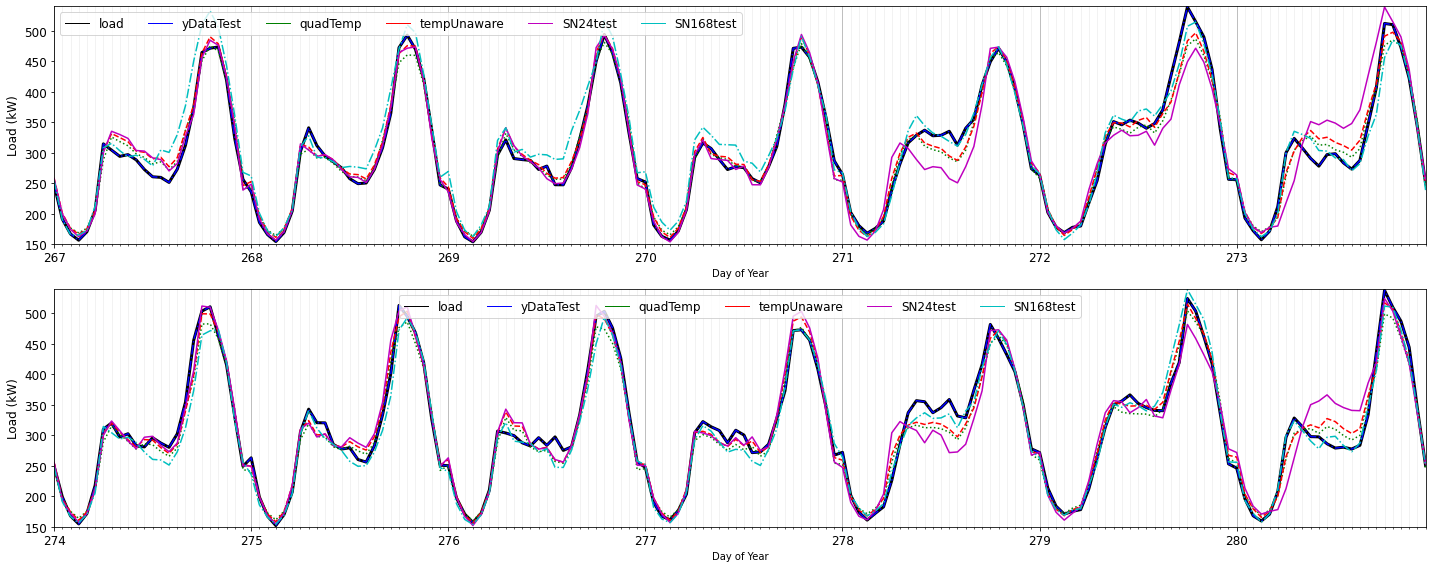

In [ ]:
# create dictionary of model names to plot

# for train windows
#models = {'yDataTrain':loadSeries['yDataTrain'],quadTemp': trainQuadraticTemp, 'tempUnaware': trainTempUnaware, \
#          'SN24train': loadSeries['SN24train'],'SN168train': loadSeries['SN168train']}
#start=windows[0,0]

#for test windows:
models = {'yDataTest':loadSeries['yDataTest'],'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
          'SN24test': loadSeries['SN24test'],'SN168test': loadSeries['SN168test']}
start=windows[4,2]

plot_forecast(2,windows,start,aggLoad,models,calVars,myStyles)
#plot_forecast(2,windows,start,aggLoad,models,calVars,myStyles)


**plot PREDICTED load profiles as stack plot for each day**

In [ ]:
# create dictionary of 'model' names to plot
models = {'load':loadSeries['yDataTest'],'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
          'SN24': loadSeries['SN24test'],'SN168': loadSeries['SN168test']}
stackplot_of_forecast(models,len(windows)*predWeeks,'print_output',figTitle='Aggregate Load by Calendar Day - Prediction Windows')

NameError: name 'colors2' is not defined

In [ ]:
# now plot same for TRAINING windows

# create dictionary of 'model' names to plot
models = {'load':loadSeries['yDataTrain'],'quadTemp': trainQuadraticTemp, 'tempUnaware': trainTempUnaware, \
          'SN24': loadSeries['SN24train']} #'SN168': loadSeries['SN168train']}
stackplot_of_forecast(models,len(windows)*trainWeeks,'print_output',figTitle='Aggregate Load by Calendar Day - Training Windows')

NameError: name 'colors2' is not defined

error analysis for AGGREGATE prediction:

In [ ]:
models = {'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
          'SN24': loadSeries['SN24test'],'SN168': loadSeries['SN168test']}
errors = get_errors(loadSeries['yDataTest'],models)
print("Mapes: \n",errors['MAPEs'])

# could also put in df with nrows = nModels; nCols = nErrorTypes
df_errors = pd.DataFrame.from_dict(errors)
df_errors['models']=list(models.keys())
df_errors = df_errors.set_index('models')
df_errors


Mapes: 
 [0.04643896 0.04766497 0.05872484 0.0702857 ]


MAPEs      MCVs     MRMSEs   MNRMSEs       MAEs
models                                                           
quadTemp       0.046439  0.062584  21.080789  0.038432  15.641958
tempUnaware    0.047665  0.066608  22.436091  0.040902  16.229485
naive1-24hrs   0.058725  0.086140  29.015512  0.052897  19.972695
naive2-168hrs  0.070286  0.100304  33.786500  0.061595  24.191265

max Value of all errors % : [0.07028569884261113, 0.1003044753990143, 33.78650033436145, 0.06159485100653525, 24.191265371527827]


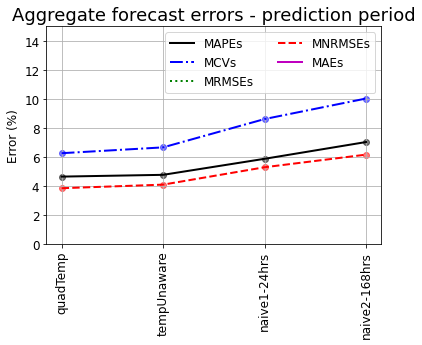

In [ ]:
plot_errors(errors,models,myStyles,figTitle='Aggregate forecast errors - prediction period')

In [ ]:
# get MAPEs for the training period for comparison : 

models = {'quadTemp': trainQuadraticTemp, 'tempUnaware': trainTempUnaware, \
          'SN24': loadSeries['SN24train'],'SN168': loadSeries['SN168train']}
errorsTrain = get_errors(loadSeries['yDataTrain'],models)
print("Mapes: \n",errorsTrain['MAPEs'])

errorsTrain

Mapes: 
 [0.04893552 0.05020689 0.06083212 0.07121303]


{'MAPEs': array([0.04893552, 0.05020689, 0.06083212, 0.07121303]),
 'MCVs': array([0.07007525, 0.07476123, 0.09508822, 0.10389915]),
 'MRMSEs': array([24.12131941, 25.73432988, 32.7312915 , 35.76419227]),
 'MNRMSEs': array([0.03830149, 0.04086274, 0.05197299, 0.05678884]),
 'MAEs': array([17.12832064, 17.80838699, 21.54582421, 25.59986984])}

max Value of all errors % : [0.07121303165176344, 0.10389915225398551, 35.76419226595053, 0.0567888409352884, 25.59986984089288]


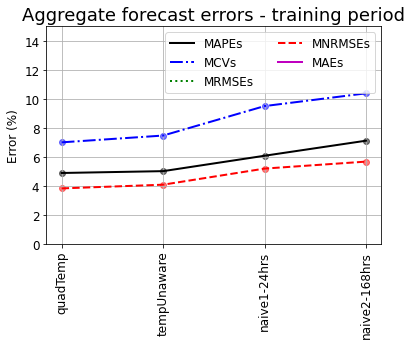

In [ ]:
plot_errors(errorsTrain,models,myStyles,figTitle='Aggregate forecast errors - training period')

In [ ]:
# aggregate: a)yData b) predictedQuadraticTemp c) predictedTempUnaware d) seasonalNaive1 e) seasonalNaive2
# individual : a) yDataIndividual_nU = hourly_df.iloc[nU,startPred:endPred].values b) predQuadraticTempIndividual[nU] c) predictedTempUnawareIndividual[nU] , etc etc


## Now run everything in one cell

series: yData: append input load for windows(0,0)+168-0:windows(0,3)-0
series: yDataTrain: append input load for windows(0,0)+168-0:windows(0,1)-0
series: SN24train: append input load for windows(0,0)+168-24:windows(0,1)-24
series: SN25train: append input load for windows(0,0)+168-25:windows(0,1)-25
series: SN26train: append input load for windows(0,0)+168-26:windows(0,1)-26
series: SN168train: append input load for windows(0,0)+168-168:windows(0,1)-168
series: yDataTest: append input load for windows(0,2)+0-0:windows(0,3)-0
series: SN24test: append input load for windows(0,2)+0-24:windows(0,3)-24
series: SN25test: append input load for windows(0,2)+0-25:windows(0,3)-25
series: SN26test: append input load for windows(0,2)+0-26:windows(0,3)-26
series: SN168test: append input load for windows(0,2)+0-168:windows(0,3)-168
7056
relative index : window to plot: [[0, 168], [168, 336]]
Index range to plot : plotStart 6384, plotEnd 6552; days 266.0 to 273.0; weeks 38.0 to 39.0
found startTick 6

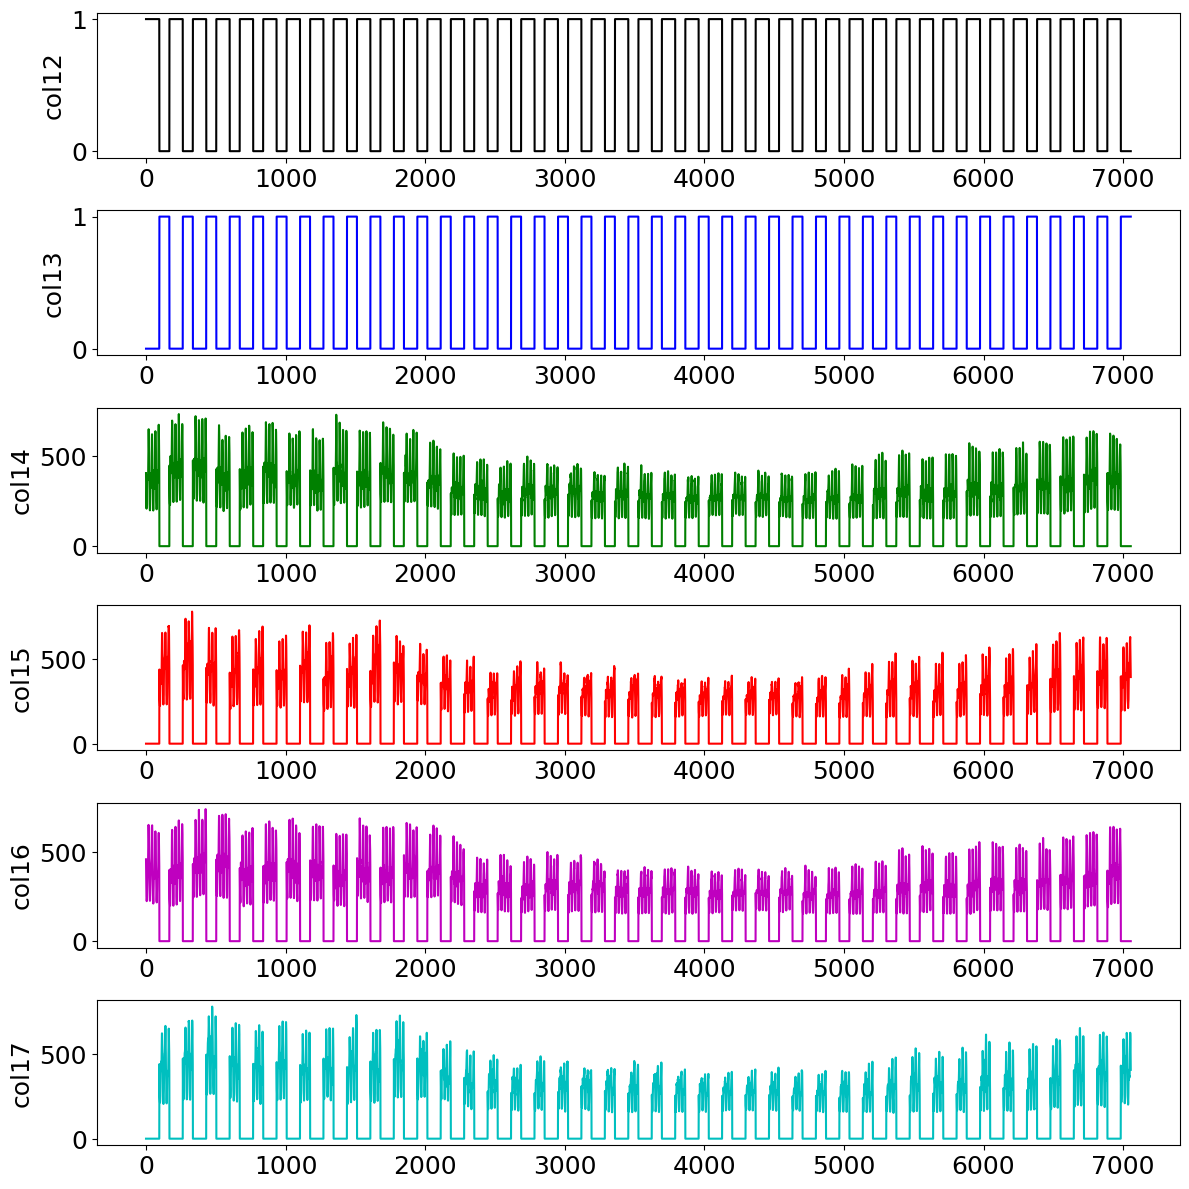

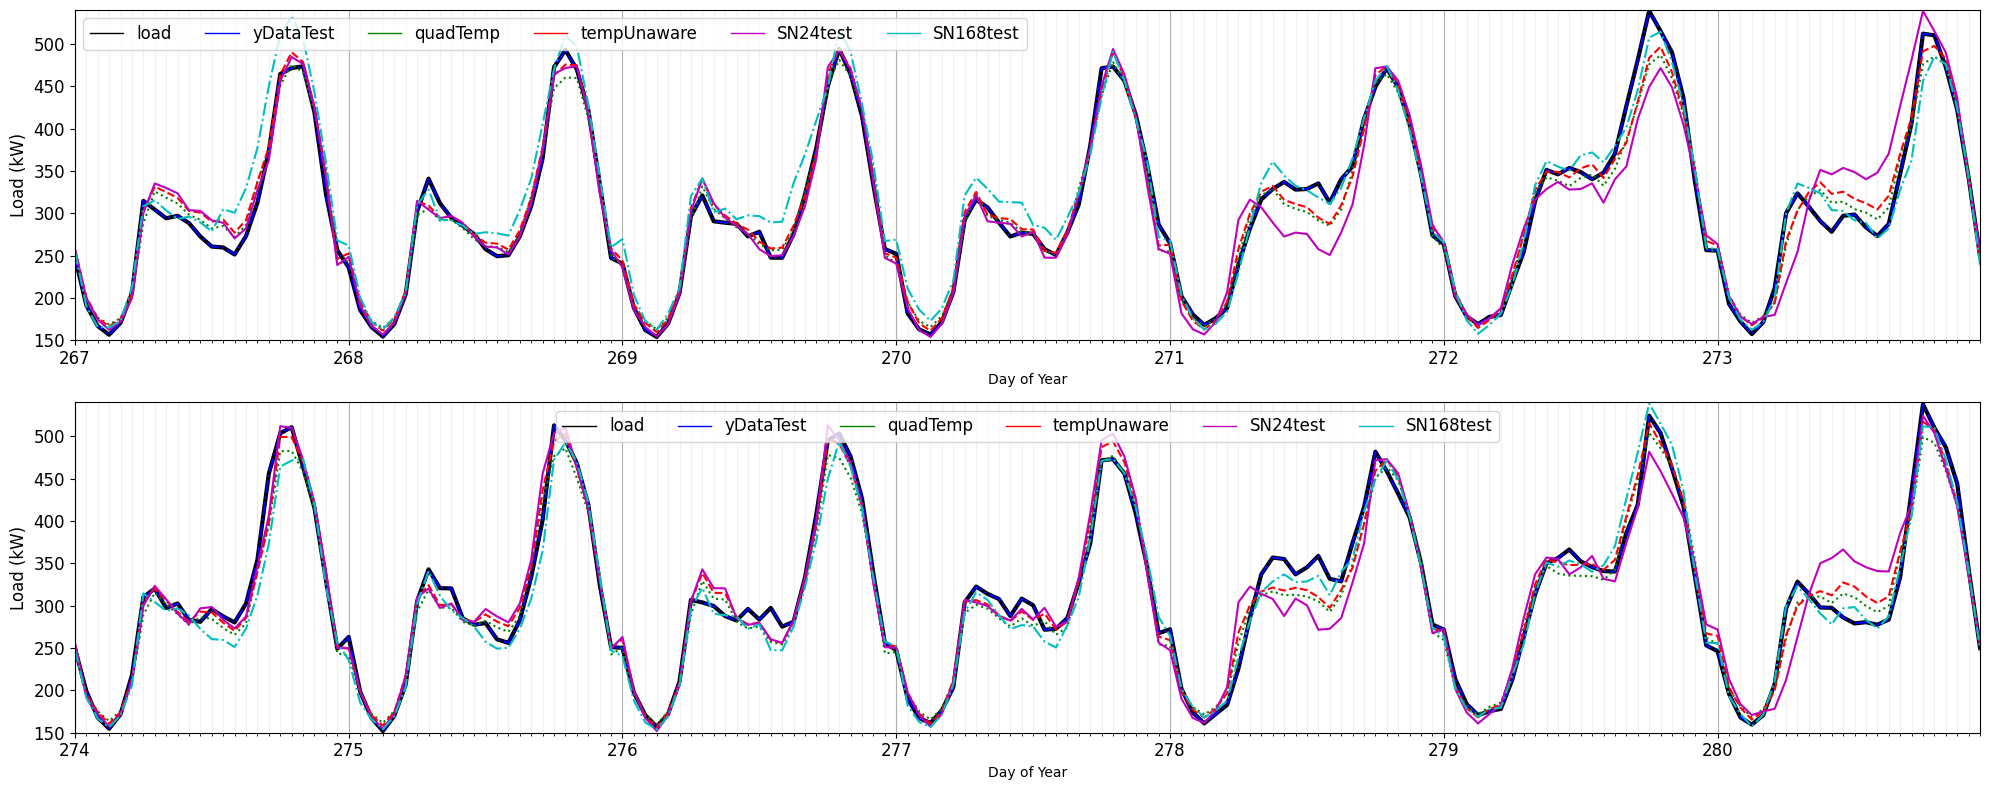

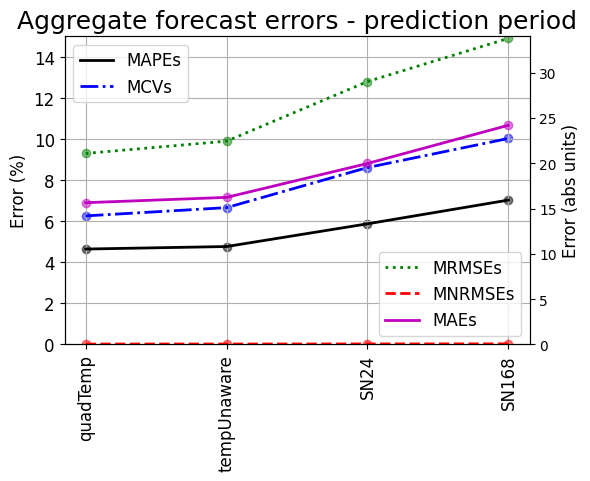

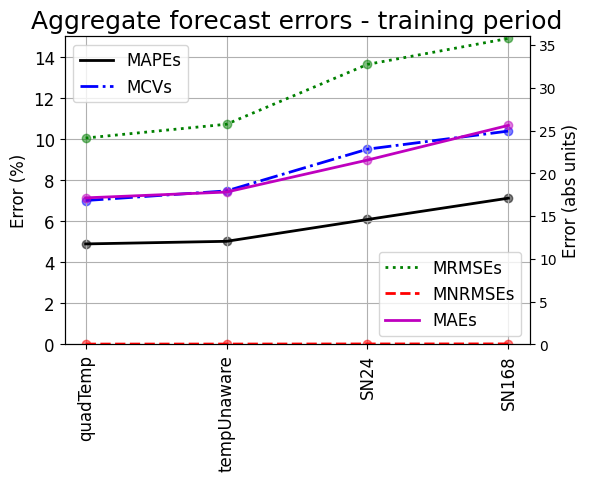

In [ ]:
# AGGREGATE CASE 

# collate adjusted load series for train and predict windows - ensure inputs are still  configured correctly 
loadSeries = set_loadSeries(windows,aggLoad,loadSeriesList,loadSeriesOffsetsWinStart,loadSeriesLags,\
                   loadSeriesWindows,'print_output')  # return dictionary of all load series 

# collate environmental data numpy arrays - same for all load combinations
envSeries = set_envSeries(windows,'ALL',temp=hourlyTemp,dayLight=hourlyDayLight,sunset=hourlySunset)


#**************REMEMBER TO SET THESE CORRECTLY! *****************

#set whether temp (12 terms) or temp + another (eg daylight hrs)
nEnvTerms = 12   # 12,18 for TempUnawar & TempQuadratic, Temp+DayLight or Temp+Sunset quadratic respectively
nDoWterms = 6    # day of week terms ie 2 * 3 (l,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags= [24,168]         # lags=[24,25,26,168]

#populate allFeatures for aggregate case  
allFeatures = populate_AllFeatures(windows,featureLength,loadSeries['yData'],aggLoad,\
                     envSeries['temp'],dayClassifier,timeLists,nEnvTerms ,PoY=PoYlist,LoD=envSeries[lodSeries],\
                              lags=lags,nDoWterms=nDoWterms)

# plot day class of allFeaturesTrain -  error checking
plot_allFeatures(nEnvTerms,nDoWterms,allFeatures)

#set train and predict features
allFeaturesTrain,allFeaturesPredict = create_TrainPredictSeries(trainLength,predLength,allFeatures,windows,nEnvTerms,nDoWterms)

# plot day class of allFeaturesTrain,allFeaturesPredict - error checking
#plot_allFeatures(nEnvTerms,1,allFeaturesTrain)
#plot_allFeatures(nEnvTerms,1,allFeaturesPredict)

# run MLR training:
#for model with Quadratic environment variable dependency 
clfQuadraticTemp,trainQuadraticTemp = mlr_train('QuadraticTemp',allFeaturesTrain,loadSeries['yDataTrain'])      
# for 'Unaware;' model i.e. with NO environment variable dependency 
clfTempUnaware,trainTempUnaware = mlr_train('TempUnaware',allFeaturesTrain[:,nEnvTerms:],loadSeries['yDataTrain'])      

# look at the predicted and actual load for the PREDICTION PERIOD
predictedQuadraticTemp = mlr_predict(clfQuadraticTemp,allFeaturesPredict,loadSeries['yDataTest'])
predictedTempUnaware = mlr_predict(clfTempUnaware,allFeaturesPredict[:,nEnvTerms:nEnvTerms+nDoWterms],loadSeries['yDataTest'])


# Plot forecast as a) standard profile :
# create dictionary of model names to plot
models = {'yDataTest':loadSeries['yDataTest'],'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
          'SN24test': loadSeries['SN24test'],'SN168test': loadSeries['SN168test']}
start=windows[4,2]
plot_forecast(2,windows,start,aggLoad,models,calVars,myStyles)

# Plot forecast as (b) stacked 1 day profiles:
# create dictionary of 'model' names to plot
models = {'load':loadSeries['yDataTest'],'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
          'SN24': loadSeries['SN24test']} #'SN168': loadSeries['SN168test']}
#stackplot_of_forecast(models,len(windows)*predWeeks)

#calculate errors and plot (prediction windows)
models = {'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
          'SN24': loadSeries['SN24test'],'SN168': loadSeries['SN168test']}
errors = get_errors(loadSeries['yDataTest'],models)
print("Mapes Forecast: \n",errors['MAPEs'])
plot_errors(errors,models,myStyles,figTitle='Aggregate forecast errors - prediction period')

#calculate errors and plot (training windows)
models = {'quadTemp': trainQuadraticTemp, 'tempUnaware': trainTempUnaware, \
          'SN24': loadSeries['SN24train'],'SN168': loadSeries['SN168train']}
errorsTrain = get_errors(loadSeries['yDataTrain'],models)
print("Mapes Training: \n",errorsTrain['MAPEs'])
plot_errors(errorsTrain,models,myStyles,figTitle='Aggregate forecast errors - training period')

with open('./aggErrorsForecast.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f, errors.keys())
    w.writeheader()
    w.writerow(errors)
    
with open('./aggErrorsTrain.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f, errorsTrain.keys())
    w.writeheader()
    w.writerow(errorsTrain)

*Now create random user groups and get aggregate load for each*     
Next 2 cells just testing

In [ ]:
# test using N=10
df_randIDgrps_N = randomUserGroups(hourly_df,10)
#print(df_randIDgrps_N)

# loop through randID groups and get aggregate load series for each
df_grpAggLoad_N = randomUserGroupAggregate(hourly_df,df_randIDgrps_N)


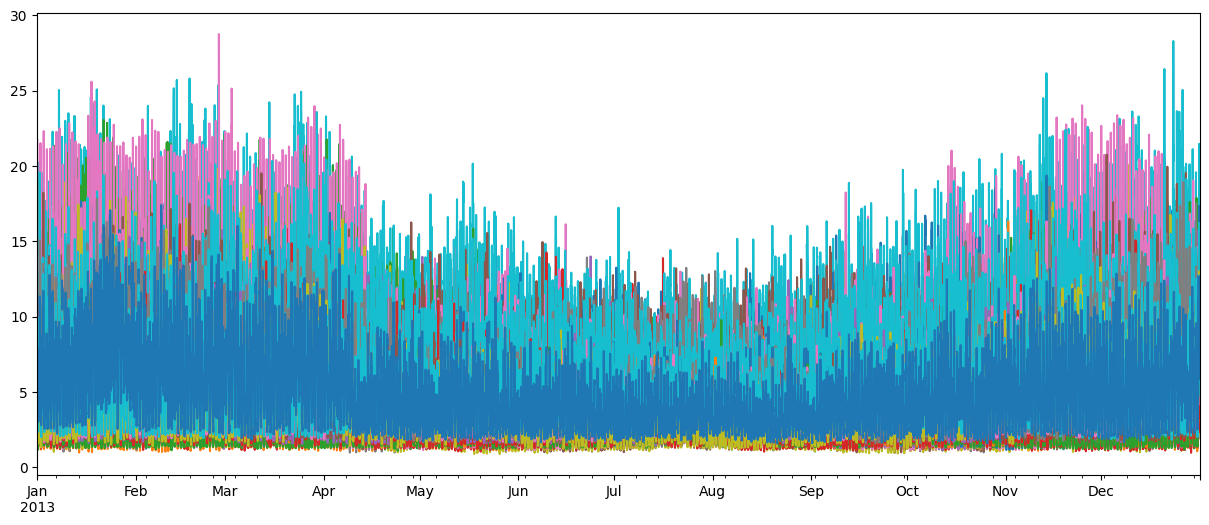

In [ ]:
# plot aggregate of sub-groups
df_grpAggLoad_N.plot(figsize=(15,6),legend=False,use_index=True)

# Now run MLR training on subsets of size N users        
loop through columns of df_grpAggLoad_N for each aggregation size N

MLR configurations to run - summary:
1) [t-24,t-168] (6 DoW load terms)+[temperature] (12 EnvTerms:{4TimeOfDay*(const,linear,quadratic terms)}
- also returns UNAWARE version (just the DoW load terms)

2) [t-24,t-25,t-26,t-168] (10 DoW terms) + [temperature] (12 EnvTerms:{4TimeOfDay*(const,linear,quadratic terms)}
- also returns UNAWARE version (just the DoW load terms)

3) [t-24,t-168] (6 DoW load terms)+[temperature] + [dayLight] 
(12 TemperatureTerms:{4TimeOfDay*(const,linear,quadratic terms)} + 6 DayLightTerms: {2 PeriodOfYear*(const,linear,quadratic terms)}
- Unaware model is same as 1)

4)  add Daylight to 2)

5),6) perhaps add sunset if exclude DST dates...
   


# define 'do it all' MLR function 
keep here for simplicity - ugly parameter list but tidy into dictionaries some other time

In [ ]:
def runMLRallAggregations(hourly_df,windows,dayClassifier,timeLists,envSeries,loadFormParams,\
                          featureLength,aggregation_N,nEnvTerms, nDoWterms,lodSeries,lags,PoYlist,\
                         calVars,myStyles):
    
    errorsAgg = {}  # create empty dictionary to hold set of dataframes with error stats for each aggregation level

    for N in aggregation_N:

        # Run 'out of sample' selection of random user subsets of size N
        df_randIDgrps_N = randomUserGroups(hourly_df,N)

        # loop through randID groups and get aggregate load series for each
        df_grpAggLoad_N = randomUserGroupAggregate(hourly_df,df_randIDgrps_N)

        #initialize dataFrame to hold error stats
        df_errorsAgg_N_MAPEs = pd.DataFrame()
        df_errorsAgg_N_MCVs = pd.DataFrame()
        df_errorsAgg_N_MNRMSEs = pd.DataFrame()

        columns=[]  # df column names

        #Loop through each aggregate group of size N 
        start_time = time.time()
        for i,col in  enumerate(df_grpAggLoad_N.columns):
            load = df_grpAggLoad_N[col]
            #print("Aggregate {0}, series length {1}".format(col,load.shape[0]))

            # collate load and environmental series for train and predict windows
            loadSeries = set_loadSeries(windows,load,\
                                        loadFormParams['loadSeriesList'],loadFormParams['loadSeriesOffsetsWinStart'],\
                                        loadFormParams['loadSeriesLags'],loadFormParams['loadSeriesWindows']\
                                       )  # return dictionary of all load series 

            #populate allFeatures 
            Features = populate_AllFeatures(windows,featureLength,loadSeries['yData'],load,\
                                 envSeries['temp'],dayClassifier,timeLists,nEnvTerms ,PoY=PoYlist,\
                                LoD=envSeries[lodSeries],lags=lags,nDoWterms=nDoWterms)      

            # plot day class of allFeaturesTrain - error checking; plot first group
            if (i==0):
                plot_allFeatures(nEnvTerms+2,1,Features,windowLength=2*168)   # plot 1 of t-24 terms   

            #set train and predict features
            FeaturesTrain,FeaturesPredict = create_TrainPredictSeries(trainLength,predLength,Features,windows,nEnvTerms,nDoWterms)

            #if (i==0):
            #    plot_allFeatures(nEnvTerms,1,allFeaturesPredict)

            # run MLR training:
            #for model with Quadratic environment variable dependency , print regression params on first iteration
            if (i==0):
                print("regression coeffs - QUADRATIC model :")
                clfQuadraticTemp,trainQuadraticTemp = mlr_train('QuadraticTemp',FeaturesTrain,loadSeries['yDataTrain'],'print_output')      
            else:
                clfQuadraticTemp,trainQuadraticTemp = mlr_train('QuadraticTemp',FeaturesTrain,loadSeries['yDataTrain'])

            # for 'Unaware;' model i.e. with NO environment variable dependency , print regression params on first iteration
            if (i==0):
                print("regression coeffs - UNAWARE model:")
                clfTempUnaware,trainTempUnaware = mlr_train('TempUnaware',FeaturesTrain[:,nEnvTerms:],loadSeries['yDataTrain'],'print_output')                                                               
            else:
                clfTempUnaware,trainTempUnaware = mlr_train('TempUnaware',FeaturesTrain[:,nEnvTerms:],loadSeries['yDataTrain'])      


            # look at the predicted and actual load for the PREDICTION PERIOD
            predictedQuadraticTemp = mlr_predict(clfQuadraticTemp,FeaturesPredict,loadSeries['yDataTest'])
            predictedTempUnaware = mlr_predict(clfTempUnaware,FeaturesPredict[:,nEnvTerms:nEnvTerms+nDoWterms],loadSeries['yDataTest'])


            # plot forecast for n (e.g. 2) 1 week sections: just for every 10th or 20th group etc
            if (i%30==0):     
                models = {'yDataTest':loadSeries['yDataTest'],'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
                          'SN24test': loadSeries['SN24test'],'SN168test': loadSeries['SN168test']}
                start=windows[4,2]
                plot_forecast(1,windows,start,load,models,calVars,myStyles,figTitle=\
                              'forecast for aggregation level '+str(N))         

            #calculate errors and plot (PREDICTION windows)
            models = {'quadTemp': predictedQuadraticTemp, 'tempUnaware': predictedTempUnaware, \
                      'SN24': loadSeries['SN24test'],'SN168': loadSeries['SN168test']}
            errors = get_errors(loadSeries['yDataTest'],models)

            #if want to plot errors .. too many 
            #if (i%20==0):      
            #    plot_errors(errors,models,myStyles,figTitle=col+'forecast errors - prediction period')

            # add col to errors df for MAPEs
            columns.append(col)
            df_errorsAgg_N_MAPEs = pd.concat([df_errorsAgg_N_MAPEs,pd.DataFrame(errors['MAPEs'])],axis=1)
            df_errorsAgg_N_MCVs = pd.concat([df_errorsAgg_N_MCVs,pd.DataFrame(errors['MCVs'])],axis=1)
            df_errorsAgg_N_MNRMSEs = pd.concat([df_errorsAgg_N_MNRMSEs,pd.DataFrame(errors['MNRMSEs'])],axis=1)

            #calculate errors and plot (training windows)                               
            models = {'quadTemp': trainQuadraticTemp, 'tempUnaware': trainTempUnaware,  \
                     'SN24': loadSeries['SN24train'],'SN168': loadSeries['SN168train']}
            errorsTrain = get_errors(loadSeries['yDataTrain'],models)
            #if (i%20==0):       
            #    plot_errors(errorsTrain,models,myStyles,figTitle=col+'forecast errors - prediction period') 
            print("For N {0},{1},MapesFC:{2},MapesTrain:{3}".format(N,col,errors['MAPEs'],\
                                                                    errorsTrain['MAPEs']))

        print("For agg level {0},-- {1} seconds to run, current time{2}".\
                  format(N,(time.time()-start_time),datetime.now().strftime("%H:%M:%S")) )

        for df in [df_errorsAgg_N_MAPEs,df_errorsAgg_N_MCVs,df_errorsAgg_N_MNRMSEs]:
            df.columns = columns
            df.index = ['quadratic','unAware','SN24test','SN168test']

        d={}
        d['MAPEs'] = df_errorsAgg_N_MAPEs
        d['MCVs'] =  df_errorsAgg_N_MCVs
        d['MRMSEs'] = df_errorsAgg_N_MNRMSEs
        errorsAgg['%d' % (N)] = d                      # update dictionary of PREDICTION errors

    return(errorsAgg)


In [ ]:
# define function to save all ANN result to disk - keep here for now ratrher than in module

def saveMLRconfigXresults(paramsDict,root,globPrefix,config,aggregation_N,resultsDictionaries):

    dirName = get_save_folderName(paramsDict,'MLR',root=root,globPrefix=globPrefix,\
                              config=config,aggregation_N=aggregation_N)

    create_save_folder(dirName)

    #save dictionaries to pickle file: TEST errors, TRAIN errors,Forecast series,N level aggregate load series
    pklsToSave=[]
    for dictName in resultsDictionaries.keys():
        pickleFileName = '/' + str(dictName) +'.pickle'
        pklsToSave.append(pickleFileName)

    for pklfile,dictName,dict in zip(pklsToSave,resultsDictionaries.keys(),resultsDictionaries.values()):
        with open(dirName+pklfile, 'wb') as f:
            pickle.dump(dict, f, protocol=pickle.HIGHEST_PROTOCOL)
        print("dictionary {0} saved to pickle file {1}".format(dictName,pklfile))

    #save parameters used to json file 
    with open(dirName+'/mlrParamsDict.json', 'w') as f:
        json.dump(paramsDict, f)
        f.close()    


In [ ]:
# Config #1 for MLR:

# [t-24,t-168] (6 DoW load terms)+[temperature] (12 EnvTerms:{4TimeOfDay*(const,linear,quadratic terms)}
#     also returns UNAWARE version (just the DoW load terms)

# First parts unlikely to need editing

# load series list to use - must have 'yData','yDataTrain','yDataTest' but other series just for plots
# and errors as regression inputs re-computed from 'yData' series in populate_AllFeatures function
loadSeriesList = ['yData',\
                  'yDataTrain','SN24train','SN25train','SN26train','SN168train',\
                  'yDataTest','SN24test','SN25test','SN26test','SN168test']        # set load series names 

# set appropriate offsets,lags, etc for load series forming
numSeries=0
for series in loadSeriesList:
    if ('train' in series) or ('Train' in series):
        numSeries+=1
print("numSeries:",numSeries)
loadSeriesOffsetsWinStart = [168] + [168]*numSeries + [0]*numSeries  # set offsets from each window start (max time lag=168)

# *** UPDATE loadSeriesLags FOR EACH NEW CONFIGURATION but ONLY if loadSeriesList changes **
#  number of elements should match loadSeriesList etc (this is before we drop any)
loadSeriesLags = [0]+[0,24,25,26,168]*2                              # set lag terms for each load series (t-lag)
loadSeriesWindows  = np.array([0,3]+[0,1]*numSeries+[2,3]*numSeries).reshape(-1,2)    # set windows for each series range
loadFormParams = {'loadSeriesList':loadSeriesList,'loadSeriesOffsetsWinStart':loadSeriesOffsetsWinStart,\
                  'loadSeriesLags':loadSeriesLags,'loadSeriesWindows':loadSeriesWindows}
 
# create PeriodOfYear classifier: h1 and h2 classes for 1st/2md half of year 
h1=np.arange(0,sum(daynum[0:6])); h2=np.arange(sum(daynum[0:6]),sum(daynum[0:12]))
PoYlist=[h1,h2]   

# set environmental series
envSeries = set_envSeries(windows,'ALL',temp=hourlyTemp,dayLight=hourlyDayLight,sunset=hourlySunset)

    
#**************REMEMBER TO SET THESE CORRECTLY! *****************
#aggregation_N = [100]  # for testing   
#aggregation_N = [5,10,20,30,40,50,75,100]   # aggregation levels : takes ~12-15mins on my laptop
aggregation_N = [1,3,5,10,20,30,40,50,75,100]  # estimate 1 hr on laptop so run on Colab

nEnvTerms = 12   # 12: for TempUnawar & TempQuadratic; 18 : Temp+DayLight or Temp+Sunset
nDoWterms = 6    # day of week terms ie 6 = 2 * 3 (1,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags=[24,168]   #lags= [24,25,26,168]    # must be consistent with nDoWterms (2*len(lags)+2)

mlrParamsDict = {'nEnvTerms':nEnvTerms,'nDoWterms':nDoWterms,'lags':lags,'lengthOfDaySeries':lodSeries,\
                 'aggregation_N':aggregation_N}

numSeries: 5


In [ ]:
# Run CONFIG1 MLR
errorsAgg = runMLRallAggregations(hourly_df,windows,dayClassifier,timeLists,envSeries,loadFormParams,\
                          featureLength,aggregation_N,nEnvTerms, nDoWterms,lodSeries,lags,PoYlist,\
                         calVars,myStyles)
config='MLRconfig1'
resultsDictionaries={'errorsAgg_dict':errorsAgg}

# save ***CONFIG1*** results
root='./project_data/intermediateDataLCL/'
globPrefix='LCL_MLR*'
saveMLRconfigXresults(mlrParamsDict,root,globPrefix,config,aggregation_N,resultsDictionaries)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Config #2 for MLR: just update variables changed since config1

# [t-24,t-25,t-26,t-168] (10 DoW terms) + [temperature] (12 EnvTerms:{4TimeOfDay*(const,linear,quadratic terms)}
# - also returns UNAWARE version (just the DoW load terms)

#**************REMEMBER TO SET THESE CORRECTLY! *****************
#aggregation_N = [5,10,20,30,40,50,75,100]   # aggregation levels : takes ~12-15mins on my laptop
aggregation_N = [1,3,5,10,20,30,40,50,75,100]  # estimate 1 hr on laptop so run on Colab


nEnvTerms = 12   # 12: for TempUnawar & TempQuadratic; 18 : Temp+DayLight or Temp+Sunset
nDoWterms = 10    # day of week terms ie 6 = 2 * 3 (1,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags=[24,25,26,168]   #lags= [24,168]    # must be consistent with nDoWterms (2*len(lags)+2)

mlrParamsDict = {'nEnvTerms':nEnvTerms,'nDoWterms':nDoWterms,'lags':lags,'lengthOfDaySeries':lodSeries,\
                 'aggregation_N':aggregation_N}

In [ ]:
# Run CONFIG2 MLR
errorsAgg = runMLRallAggregations(hourly_df,windows,dayClassifier,timeLists,envSeries,loadFormParams,\
                          featureLength,aggregation_N,nEnvTerms, nDoWterms,lodSeries,lags,PoYlist,\
                         calVars,myStyles)
config='MLRconfig2'

resultsDictionaries={'errorsAgg_dict':errorsAgg}

# save ***CONFIG2*** results
root='./project_data/intermediateDataLCL/'
globPrefix='LCL_MLR*'
saveMLRconfigXresults(mlrParamsDict,root,globPrefix,config,aggregation_N,resultsDictionaries)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Config #3 for MLR: just update variables changed since config2

# [t-24,t-168] (6 DoW load terms)+[temperature] + [dayLight] 
#(12 TemperatureTerms:{4TimeOfDay*(const,linear,quadratic terms)} + 6 DayLightTerms: {2 PeriodOfYear*(const,linear,quadratic terms)}
# Unaware model is same as 1)

#**************REMEMBER TO SET THESE CORRECTLY! *****************
#aggregation_N = [5,10,20,30,40,50,75,100]   # aggregation levels : takes ~12-15mins on my laptop
aggregation_N = [1,3,5,10,20,30,40,50,75,100]  # estimate 1 hr on laptop so run on Colab


nEnvTerms = 18   # 12: for TempUnawar & TempQuadratic; 18 : Temp+DayLight or Temp+Sunset
nDoWterms = 6    # day of week terms ie 6 = 2 * 3 (1,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags=[24,168]   #lags= [24,25,26,168]    # must be consistent with nDoWterms (2*len(lags)+2)

mlrParamsDict = {'nEnvTerms':nEnvTerms,'nDoWterms':nDoWterms,'lags':lags,'lengthOfDaySeries':lodSeries,\
                 'aggregation_N':aggregation_N}

In [ ]:
# Run CONFIG3 MLR
errorsAgg = runMLRallAggregations(hourly_df,windows,dayClassifier,timeLists,envSeries,loadFormParams,\
                          featureLength,aggregation_N,nEnvTerms, nDoWterms,lodSeries,lags,PoYlist,\
                         calVars,myStyles)
config='MLRconfig3'
resultsDictionaries={'errorsAgg_dict':errorsAgg}

# save ***CONFIG3*** results
root='./project_data/intermediateDataLCL/'
globPrefix='LCL_MLR*'
saveMLRconfigXresults(mlrParamsDict,root,globPrefix,config,aggregation_N,resultsDictionaries)


KeyboardInterrupt: ignored

In [ ]:
# Config #4 for MLR: just update variables changed since config2

# [t-24,t-25,t-26,t-168] (10 DoW load terms)+[temperature] + [dayLight] 
#(12 TemperatureTerms:{4TimeOfDay*(const,linear,quadratic terms)} + 6 DayLightTerms: {2 PeriodOfYear*(const,linear,quadratic terms)}
# Unaware model is same as 2)

#**************REMEMBER TO SET THESE CORRECTLY! *****************
#aggregation_N = [5,10,20,30,40,50,75,100]   # aggregation levels : takes ~12-15mins on my laptop
aggregation_N = [1,3,5,10,20,30,40,50,75,100]  # estimate 1 hr on laptop so run on Colab


nEnvTerms = 18   # 12: for TempUnawar & TempQuadratic; 18 : Temp+DayLight or Temp+Sunset
nDoWterms = 10    # day of week terms ie 6 = 2 * 3 (1,l(t-24),l(t-168))
lodSeries='dayLight'   # or 'sunset'
lags=[24,25,26,168]   #lags= [24,25,26,168]    # must be consistent with nDoWterms (2*len(lags)+2)

mlrParamsDict = {'nEnvTerms':nEnvTerms,'nDoWterms':nDoWterms,'lags':lags,'lengthOfDaySeries':lodSeries,\
                 'aggregation_N':aggregation_N}

In [ ]:
# Run CONFIG4 MLR
errorsAgg = runMLRallAggregations(hourly_df,windows,dayClassifier,timeLists,envSeries,loadFormParams,\
                          featureLength,aggregation_N,nEnvTerms, nDoWterms,lodSeries,lags,PoYlist,\
                         calVars,myStyles)
config='MLRconfig4'
resultsDictionaries={'errorsAgg_dict':errorsAgg}

# save ***CONFIG4*** results
root='./project_data/intermediateDataLCL/'
globPrefix='LCL_MLR*'
saveMLRconfigXresults(mlrParamsDict,root,globPrefix,config,aggregation_N,resultsDictionaries)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!zip -r /content/LCL_MLR_ColabResults.zip /content/project_data/intermediateDataLCL/
!ls
from google.colab import files
files.download("/content/LCL_MLR_ColabResults.zip") 

  adding: content/project_data/intermediateDataLCL/ (stored 0%)
  adding: content/project_data/intermediateDataLCL/LCL_hourly_df.pkl (deflated 71%)
  adding: content/project_data/intermediateDataLCL/LCL_MLR_MLRconfig3run4_ALLincl1_18envTerms_6DoWterms/ (stored 0%)
  adding: content/project_data/intermediateDataLCL/LCL_MLR_MLRconfig3run4_ALLincl1_18envTerms_6DoWterms/mlrParamsDict.json (deflated 17%)
  adding: content/project_data/intermediateDataLCL/LCL_MLR_MLRconfig3run4_ALLincl1_18envTerms_6DoWterms/errorsAgg_dict.pickle (deflated 30%)
  adding: content/project_data/intermediateDataLCL/LCL_MLR_MLRconfig2run3_ALLincl1_12envTerms_10DoWterms/ (stored 0%)
  adding: content/project_data/intermediateDataLCL/LCL_MLR_MLRconfig2run3_ALLincl1_12envTerms_10DoWterms/mlrParamsDict.json (deflated 19%)
  adding: content/project_data/intermediateDataLCL/LCL_MLR_MLRconfig2run3_ALLincl1_12envTerms_10DoWterms/errorsAgg_dict.pickle (deflated 30%)
  adding: content/project_data/intermediateDataLCL/LCL_ML

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Read in previous MLR runs and plot errors

For each configuration run:
1. retrieve error dictionary
2. flip dictionary nestings
3. get error percentiles
4. plot boxplot/swarm plot
5. Add percentiles to plot (optional)
6. Repeat for eache errror type? 

back to desktop notebook for plotting